# Determining if Mohamed Salah is worth Re-signing using Machine Learning
## Kiro Shaker
## kms475@pitt.edu

### Research Question
Based on Mohamed Salah's (a winger for the football team Liverpool) performances during his time with the team, I will create a machine learning model to predict if Salah will contribute a goal or assist during a game based on the trends in his performance with the team.

### Why is it Interesting
I am a big Liverpool fan and a bigger Mohamed Salah fan, and many people claimed after his first spectacular season with Liverpool was a fluke and that he couldn't keep performing at a high level. Many are questioning if Liverpool should keep Salah, or sell him at his peak. I intend on using data to determine the future of his performance with the team, and decide whether he should be re-signed or sold at a high price.

### Why is it Useful
Along with my personal reasons of wanting to prove Salah's eliteness in the Premier League, many are wondering if it would be a wise decision for Liverpool to resign the winger as he is beginning to reach the age where many players' performance begins to dwindle. Based on the results of my research and predicting the trend that his performance may follow, it will help in making an informed decision as to whether or not the winger should be re-signed or sold to another team. This methodology can also be applied to any other player, which would allow football clubs to decide whether it is in their best interest to re-sign a player, or sell them at their peak price.

### Who would use it
I will use this model to show Mohamed Salah's trend in performance over the years in the Premier League. Liverpool would also be able to use this model to determine if it would be a good decision to re-sign Salah, or to sell him to another team while possible. Many other football clubs can use this to determine the trends in performance for their players as well.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

salah_matches = pd.read_csv("Salah_PL_Matches.csv")

In [2]:
salah_matches.head()

,goals,shots,xG,time,position,h_team,a_team,h_goals,a_goals,date,season,xA,assists,key_passes,npg,npxG,xGChain,xGBuildup
0,2,4,0.867836,90,AMR,Bournemouth,Liverpool,0,2,2025-02-01,2024,0.204263,0,2,1,0.106667,1.616778,1.305848
1,1,3,0.409520,90,AMR,Liverpool,Ipswich,4,1,2025-01-25,2024,0.084179,0,1,1,0.409520,1.099812,0.606113
2,0,3,0.267980,90,AMR,Brentford,Liverpool,0,2,2025-01-18,2024,1.007233,0,7,0,0.267980,1.917148,0.763454
3,0,6,0.390731,90,AMR,Nottingham Forest,Liverpool,1,1,2025-01-14,2024,0.548716,0,4,0,0.390731,0.853634,0.000000
4,1,4,1.014381,90,AMR,Liverpool,Manchester United,2,2,2025-01-05,2024,0.396767,0,2,0,0.253213,0.655002,0.194241


## Missing Values:

In [4]:
salah_matches.isnull().sum()

goals         0
shots         0
xG            0
time          0
position      0
h_team        0
a_team        0
h_goals       0
a_goals       0
date          0
season        0
xA            0
assists       0
key_passes    0
npg           0
npxG          0
xGChain       0
xGBuildup     0
dtype: int64

In [5]:
salah_matches['date'] = pd.to_datetime(salah_matches['date'], errors='coerce')
salah_matches = salah_matches.dropna(subset=['date'])
salah_matches = salah_matches[salah_matches['date'] > pd.Timestamp('2017-05-28')]
salah_matches['date'] = salah_matches['date'].astype('int')
salah_matches['date_ranked'] = salah_matches['date'].rank(method='dense', ascending=True)
salah_matches.tail()

,goals,shots,xG,time,position,h_team,a_team,h_goals,a_goals,date,season,xA,assists,key_passes,npg,npxG,xGChain,xGBuildup,date_ranked
268,1,6,0.270394,90,FWR,Liverpool,Burnley,1,1,1505520000000000000,2017,0.189339,0,3,1,0.270394,0.618713,0.158980,5.0
269,0,1,0.305673,54,FWR,Manchester City,Liverpool,5,0,1504915200000000000,2017,0.059068,0,1,0,0.305673,0.372731,0.067057,4.0
270,1,5,1.607430,90,FWR,Liverpool,Arsenal,4,0,1503792000000000000,2017,0.632711,1,1,1,1.607430,2.401100,0.160958,3.0
271,0,2,0.061654,28,Sub,Liverpool,Crystal Palace,1,0,1503100800000000000,2017,0.098979,0,1,0,0.061654,0.224635,0.064002,2.0
272,1,5,1.162000,90,FWR,Watford,Liverpool,3,3,1502496000000000000,2017,0.000000,0,0,1,1.162000,1.300150,0.138149,1.0


### Dealing with Missing Values:
None of the values in my dataset are missing, so I won't have to impute or remove any values. I did decide to remove any games before Salah's time at Liverpool as they are irrelevant for my research purposes. My research question is only focusing on Salah's performance as a Liverpool player. I also listed the dates in date_ranked in increasing order starting at 1 and incrementing as the dates increase.

## Outliers:

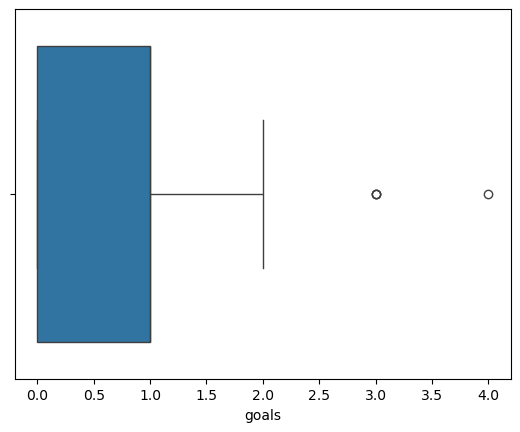

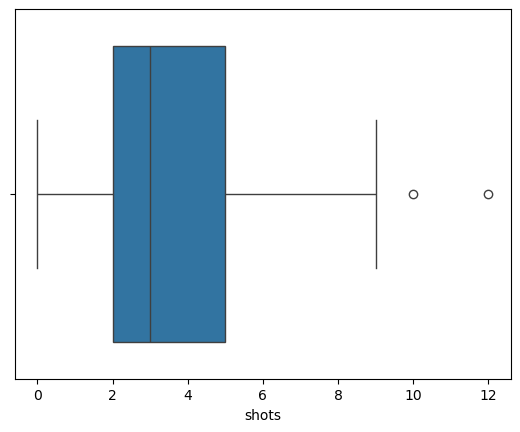

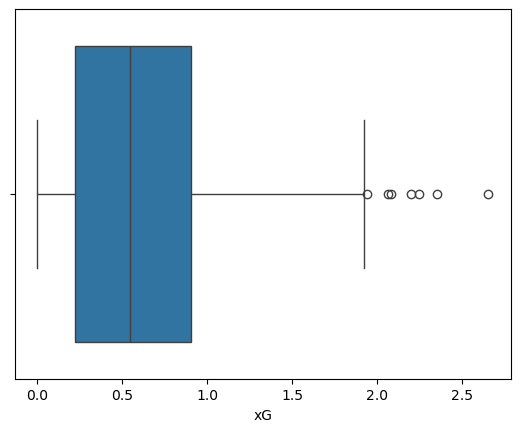

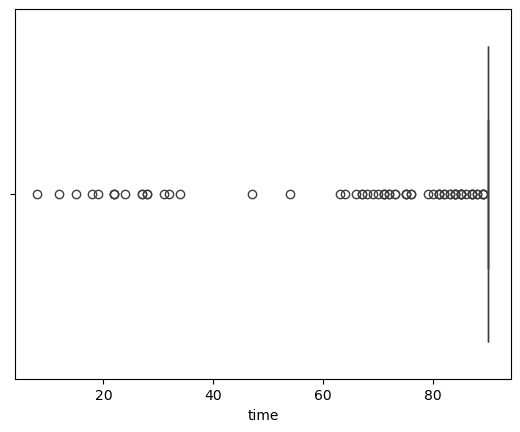

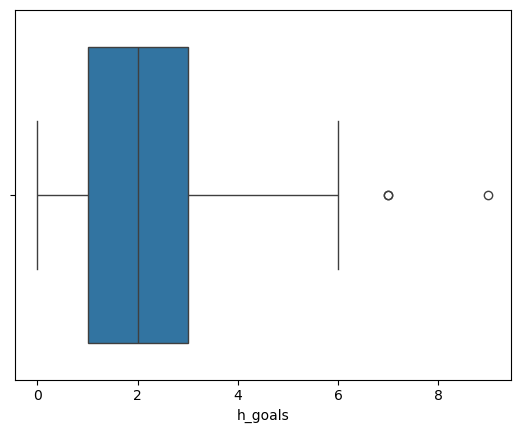

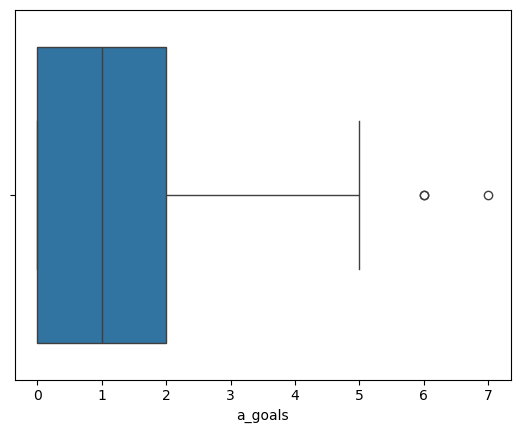

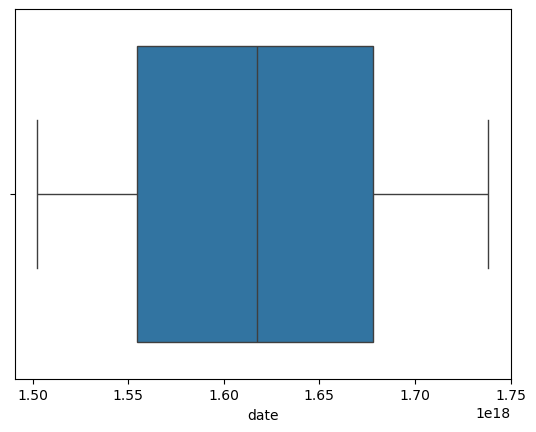

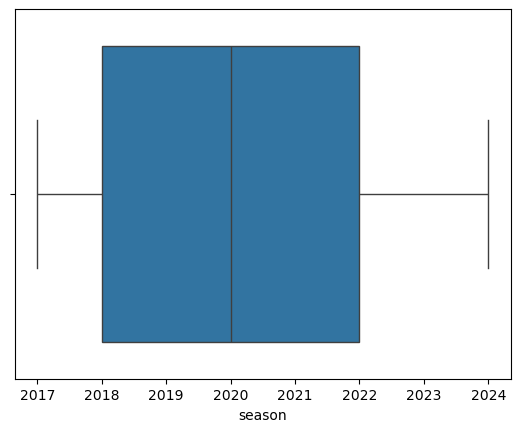

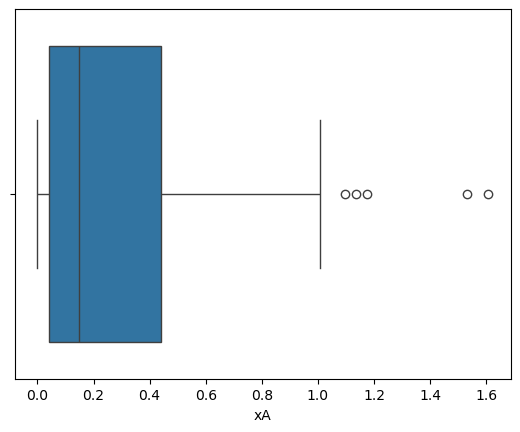

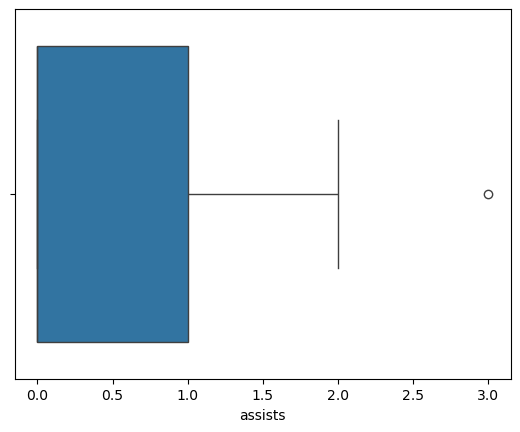

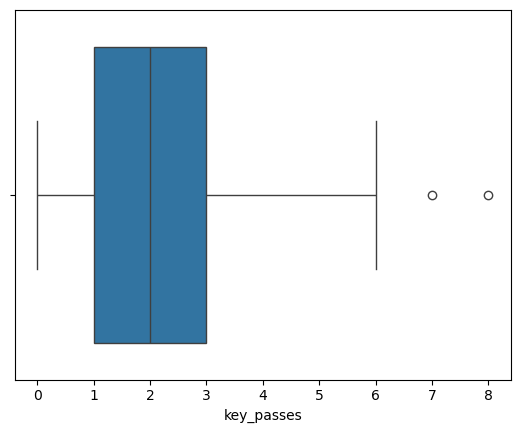

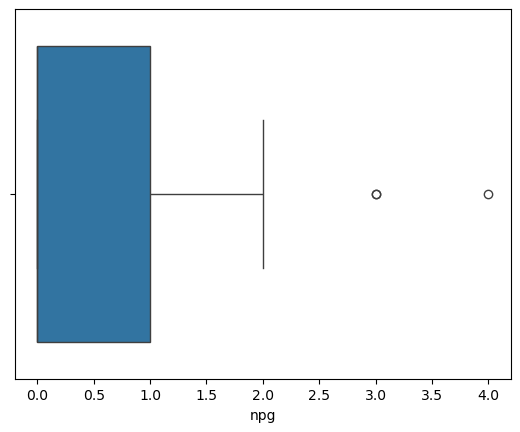

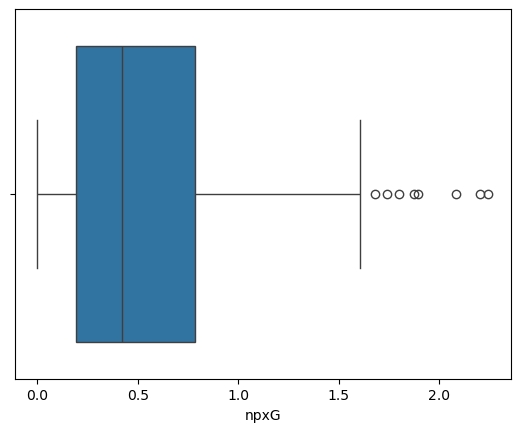

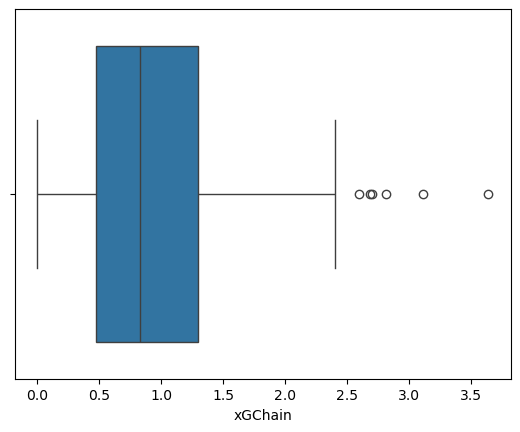

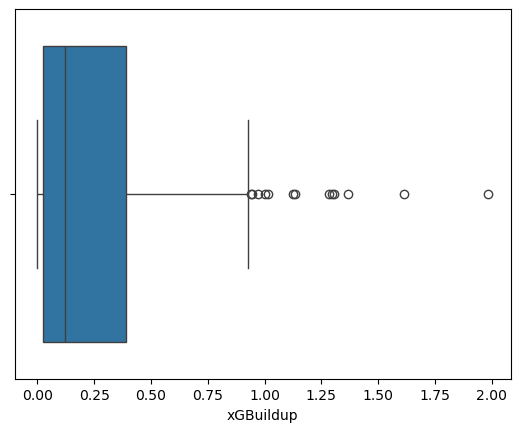

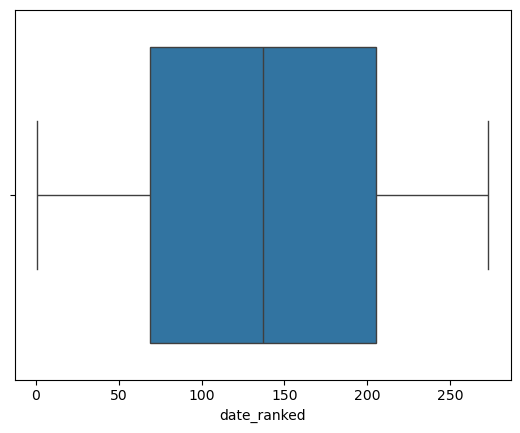

In [8]:
for col in salah_matches.select_dtypes(include='number').columns:
    sn.boxplot(data=salah_matches, x=col)
    plt.show()

### Explanation for Outliers:
Although some of the columns do possess outliers, it would be unwise to drop them as they represent the games Salah overperformed or underperformed, which is necessary to take into account for our purposes as those performances contribute to determining Salah's impact on the team.

## Distribution:

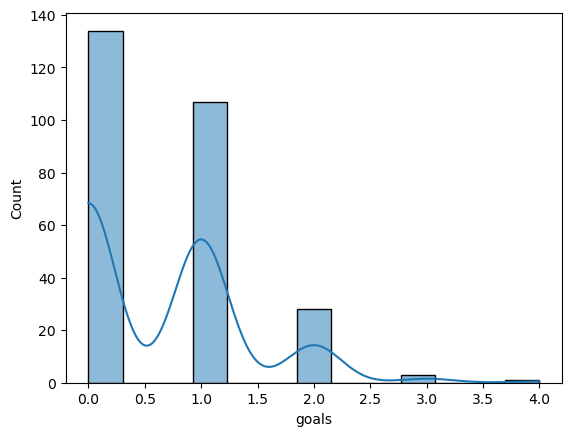

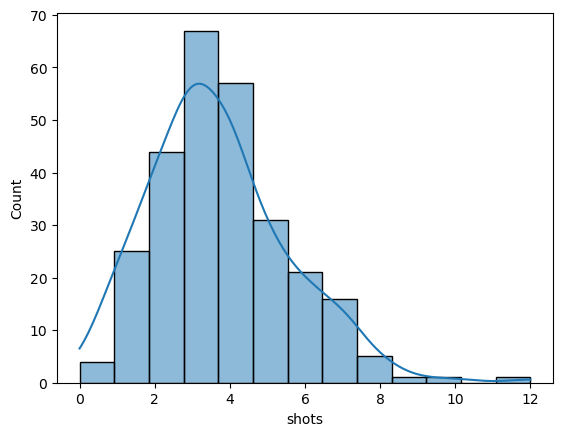

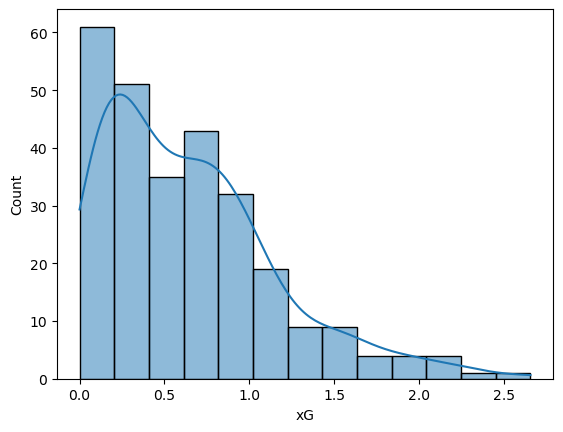

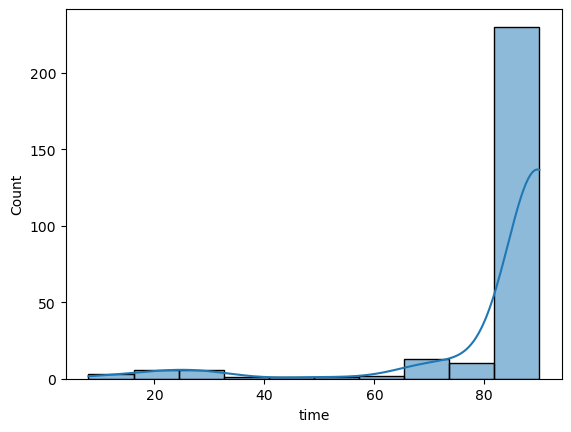

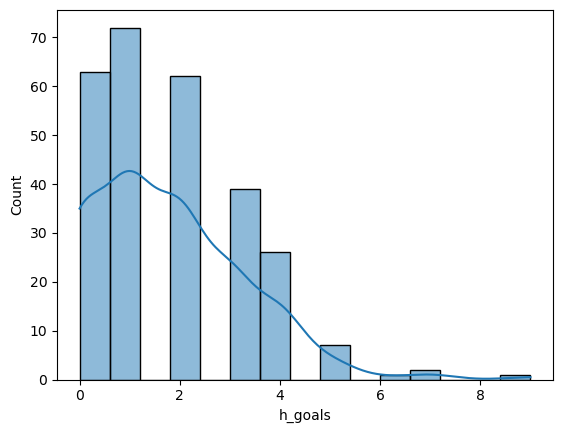

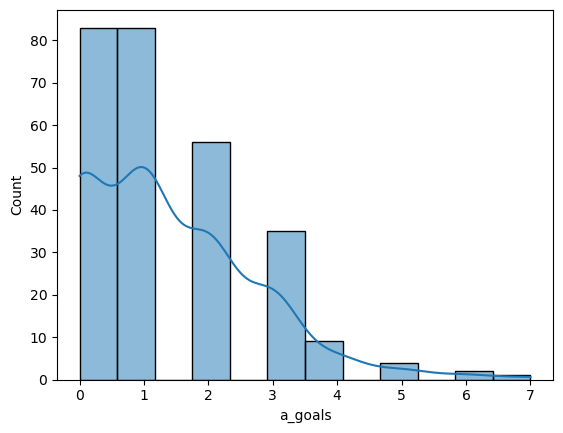

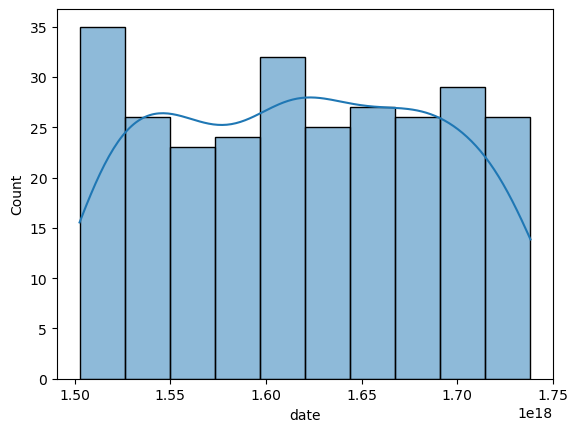

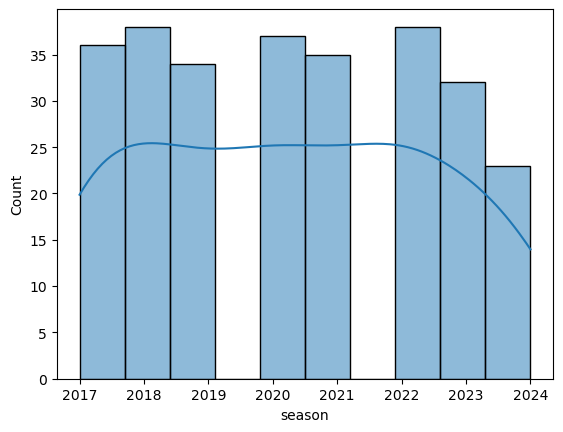

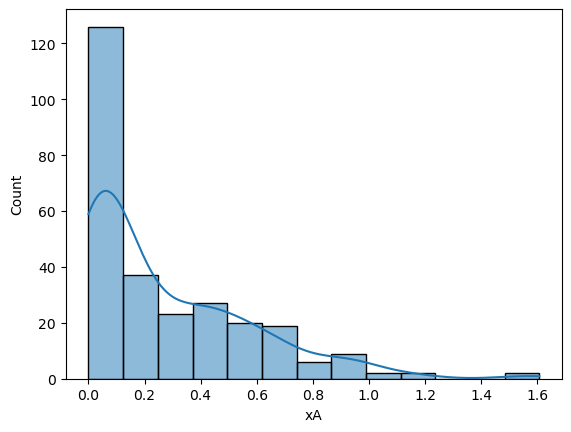

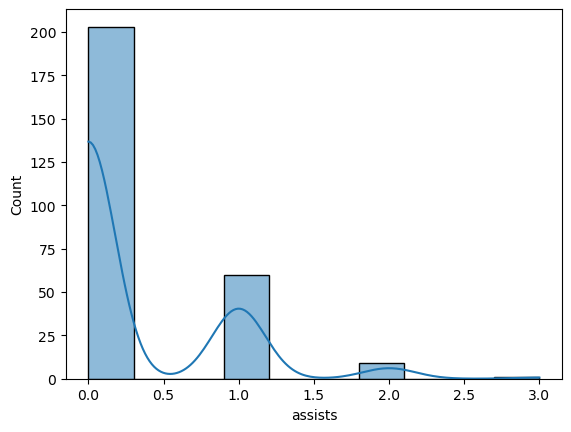

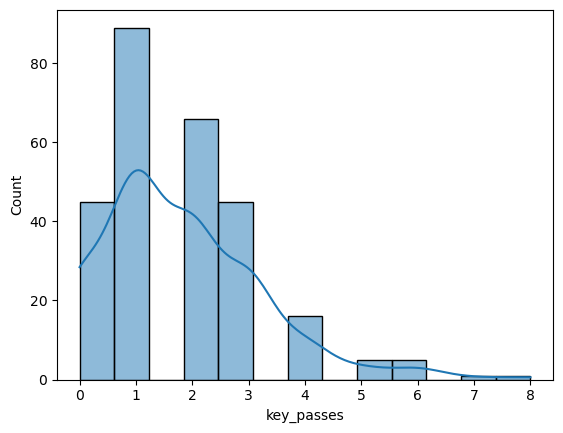

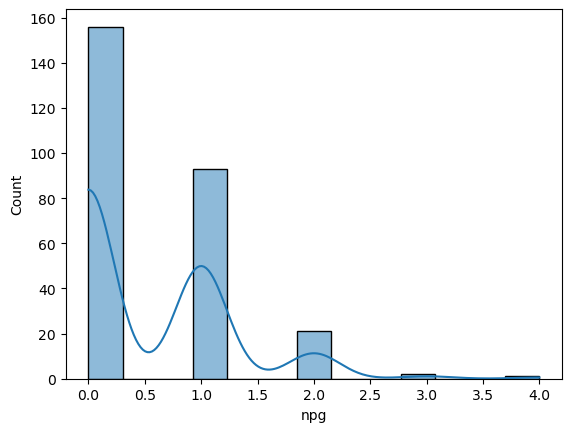

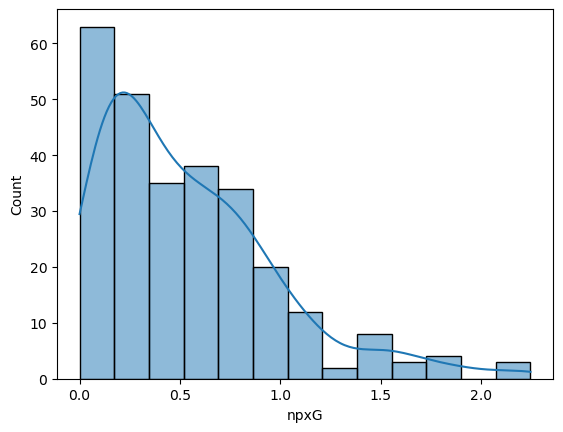

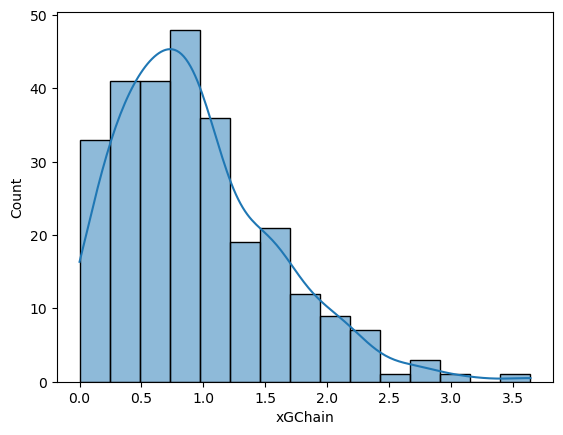

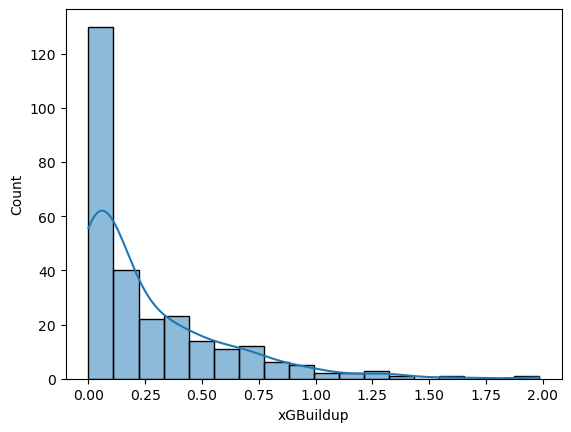

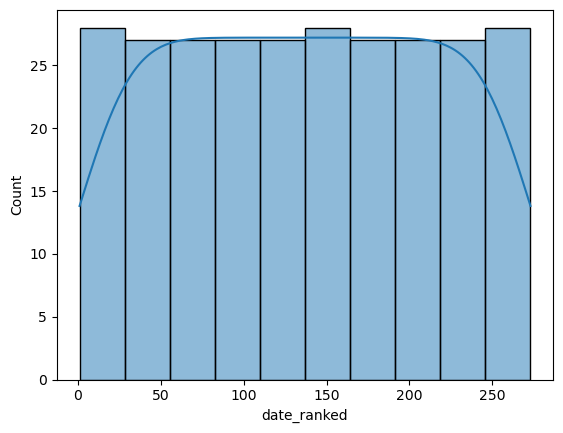

In [15]:
for col in salah_matches.select_dtypes(include='number').columns:
    sn.histplot(data=salah_matches, x=col, kde=True)
    plt.show()

### Approach for Normalizing Distributions
Based on the skewed distributions of the numeric columns, I will perform square root transformation in order to normalize the distributions. I will leave out season and date_ranked from the transfomation as they are already distributed normally, and I want to keep the incrementation in their values to represent the progression of time in Salah's career properly.

In [17]:
salah_matches_T = salah_matches
for col in salah_matches_T.select_dtypes(include='number').columns:
    salah_matches_T[col + '_T'] = np.sqrt(salah_matches_T[col])
salah_matches_T['season'] = salah_matches['season']
salah_matches_T['date_ranked'] = salah_matches['date_ranked']

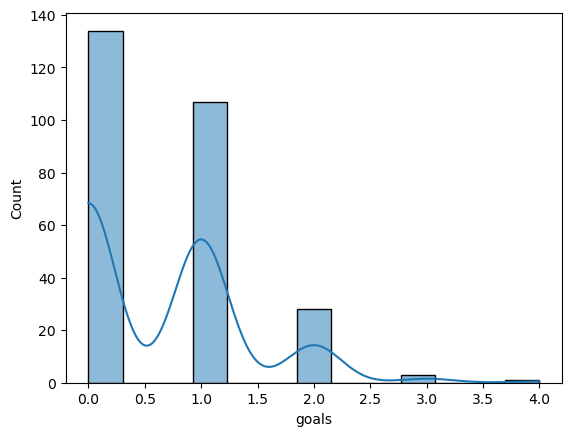

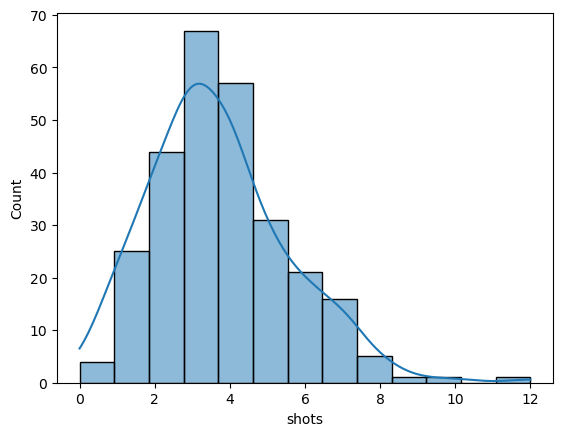

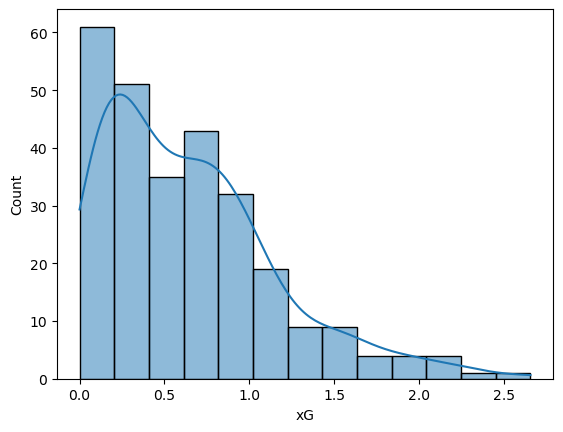

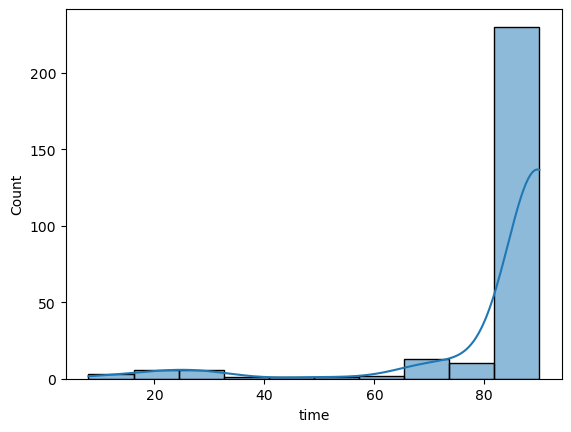

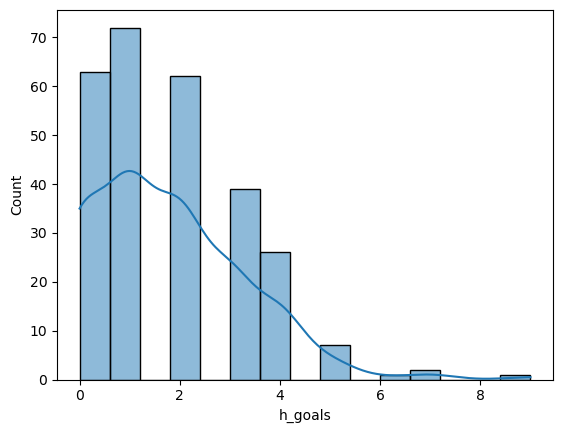

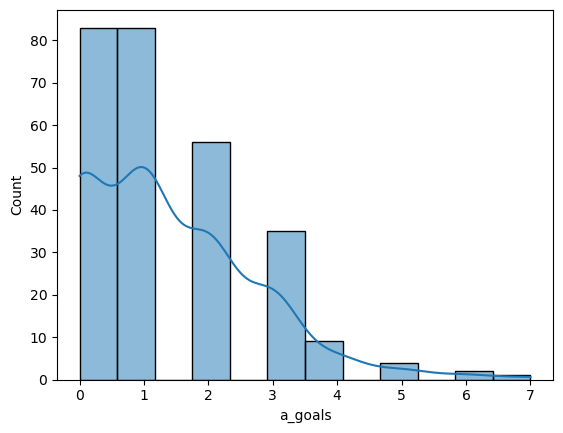

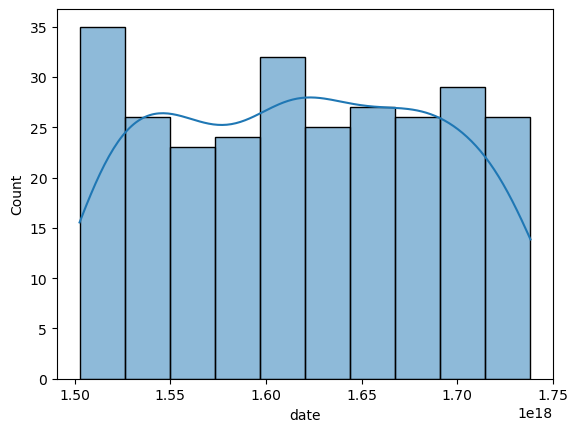

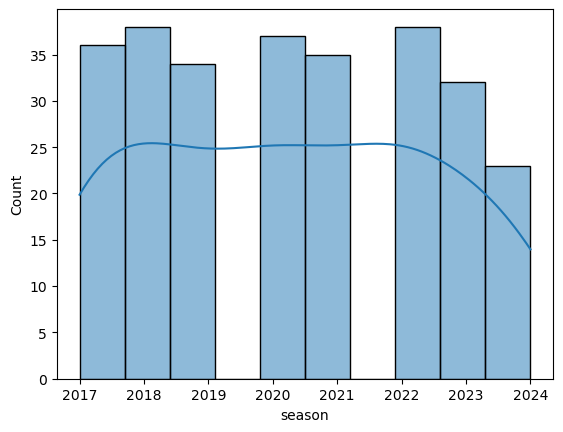

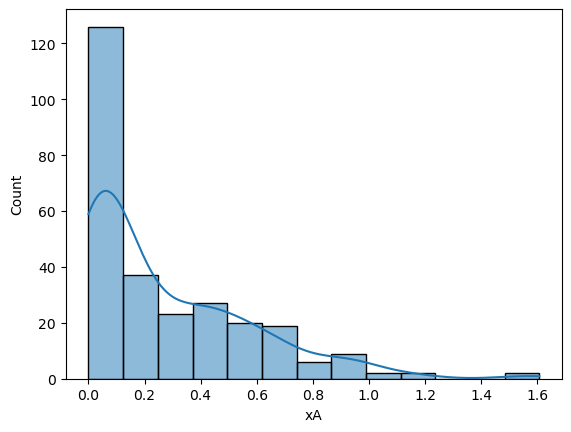

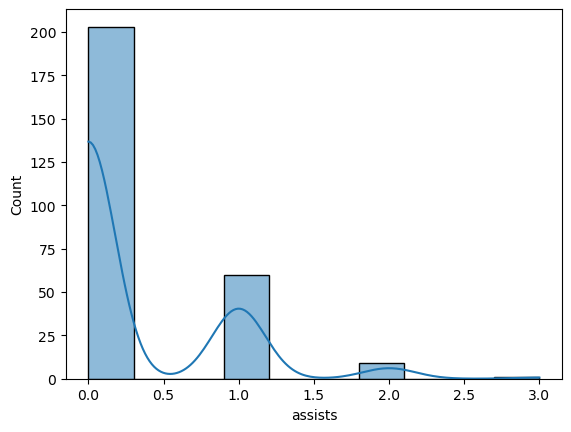

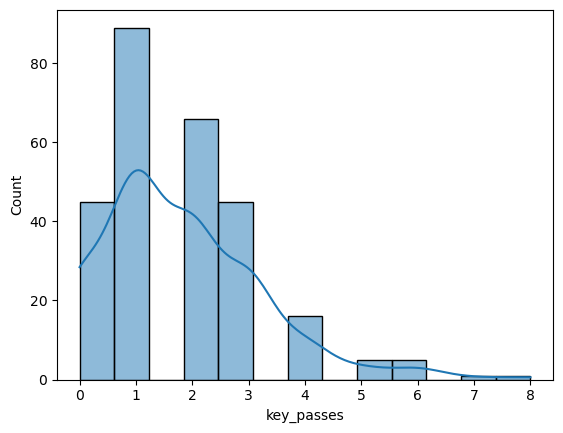

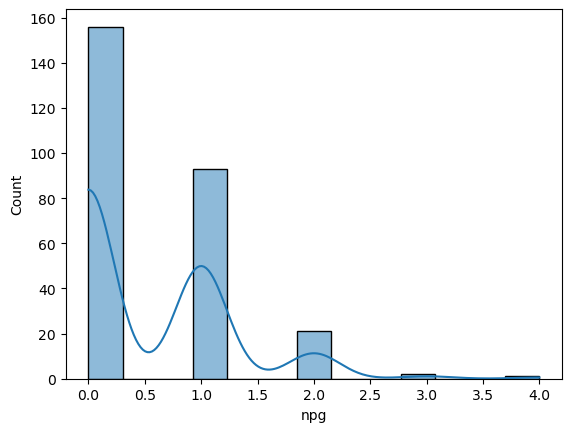

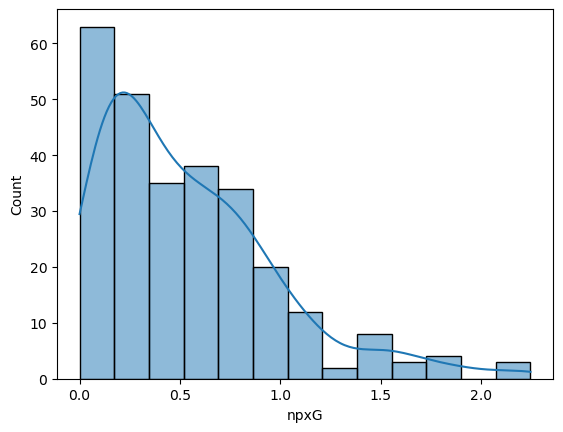

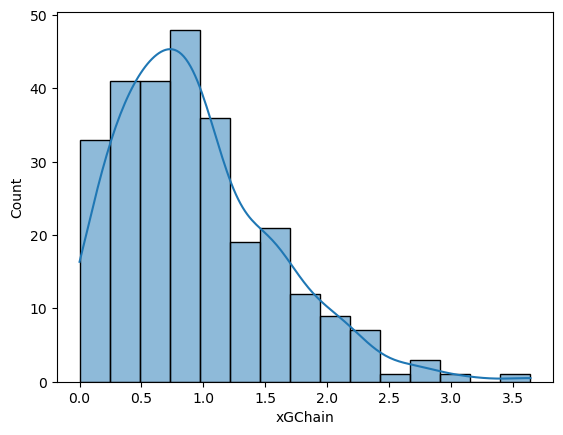

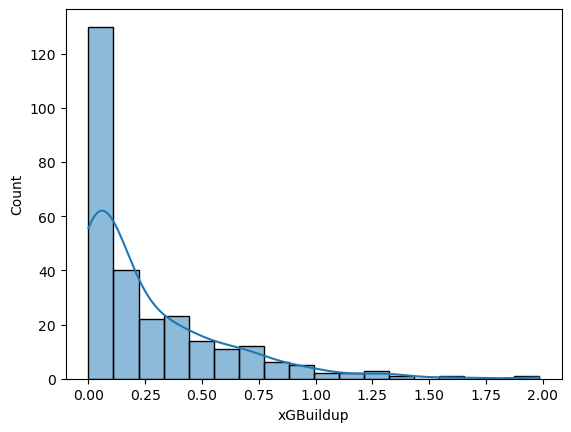

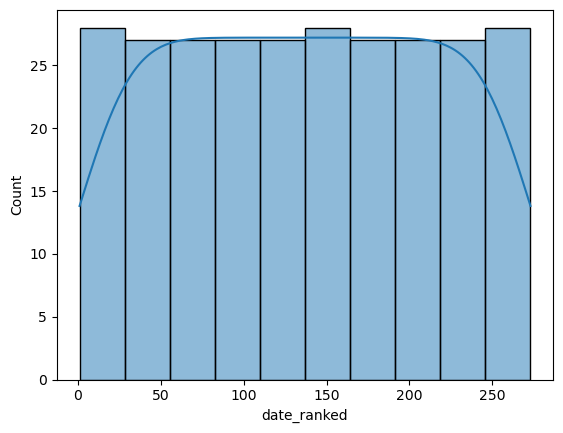

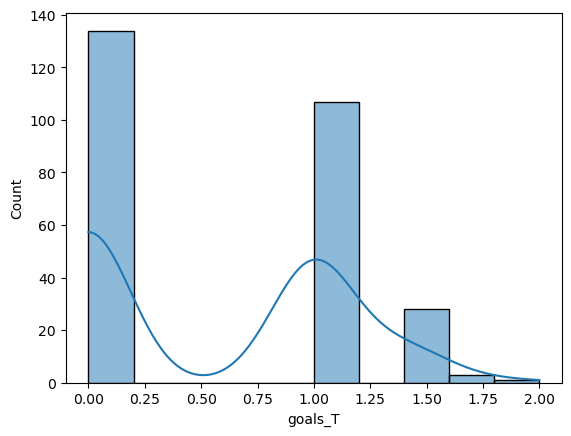

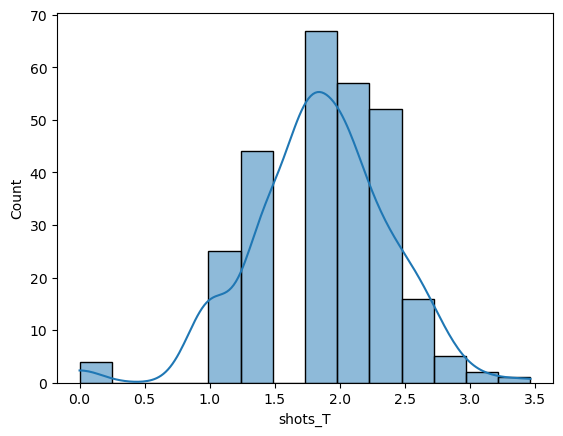

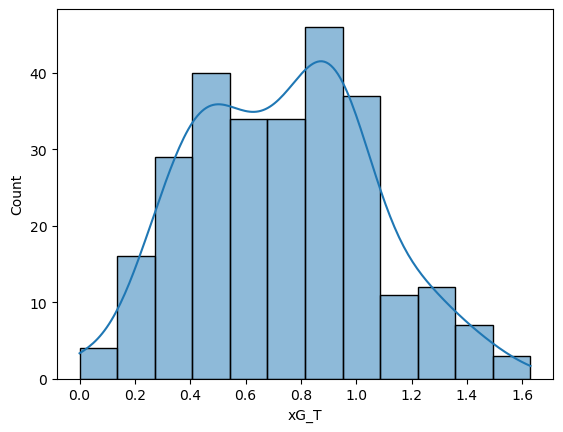

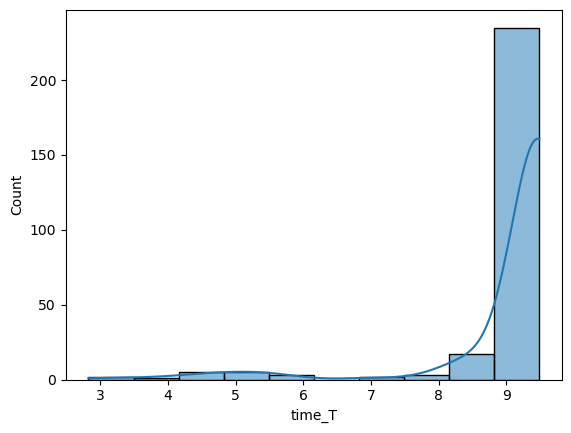

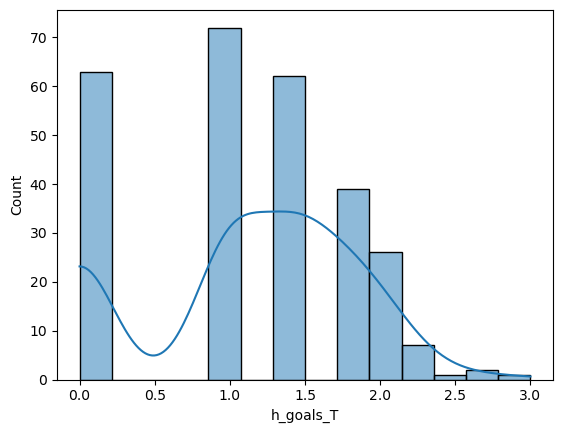

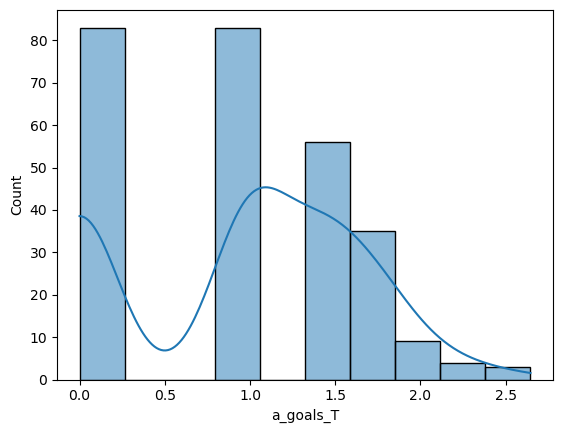

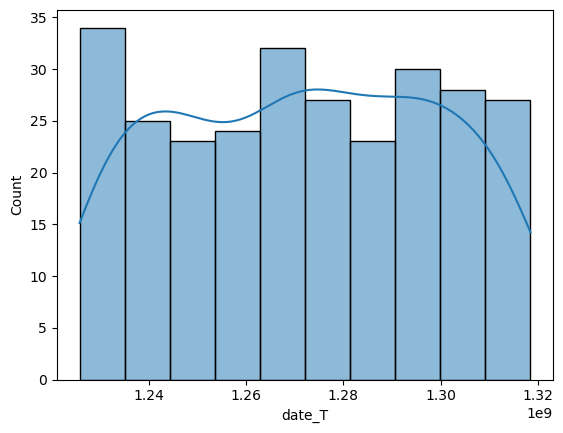

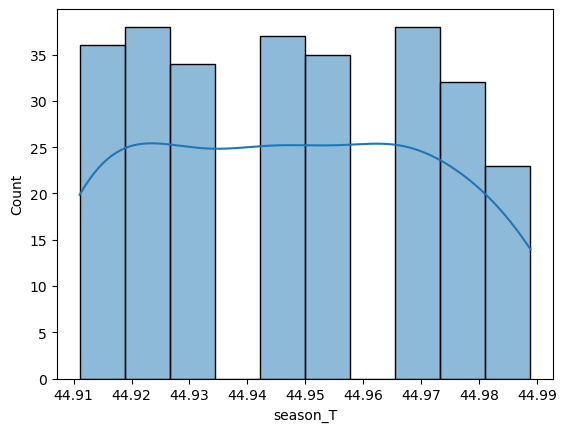

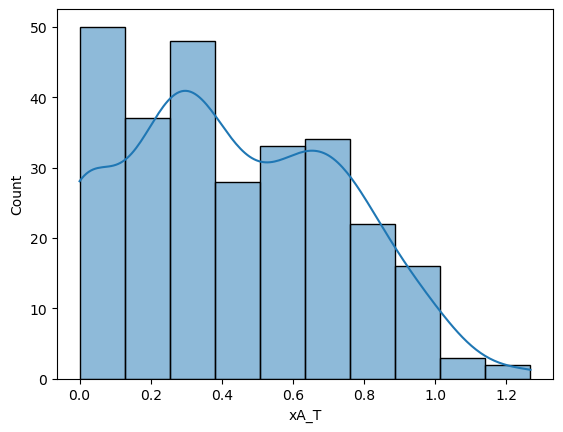

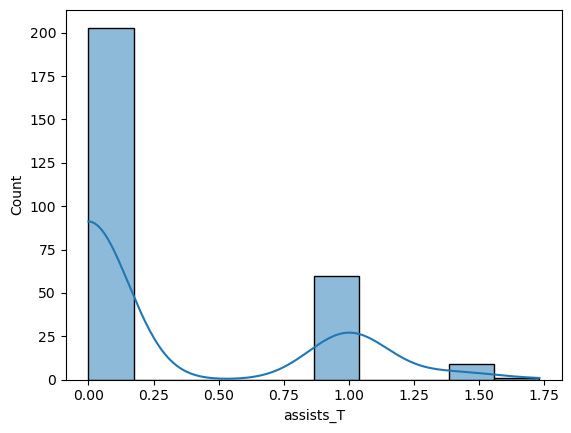

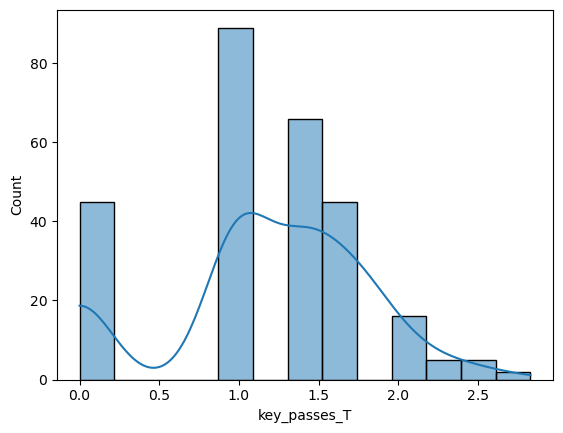

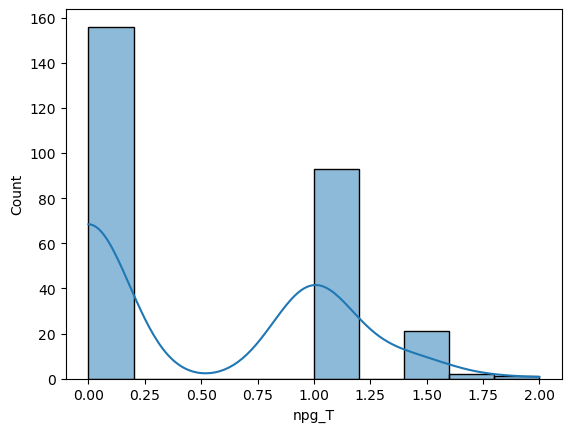

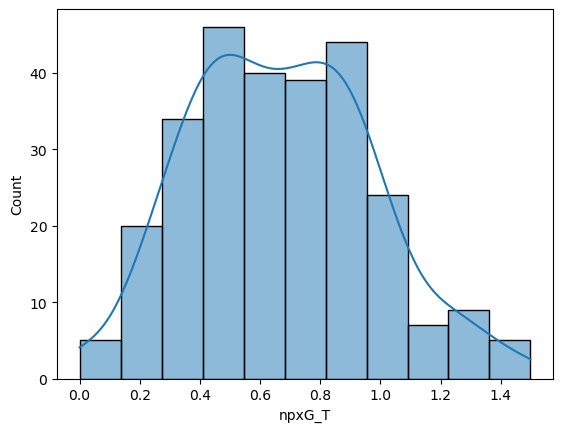

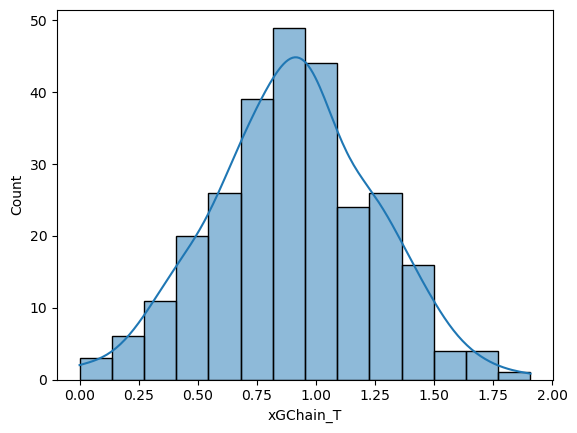

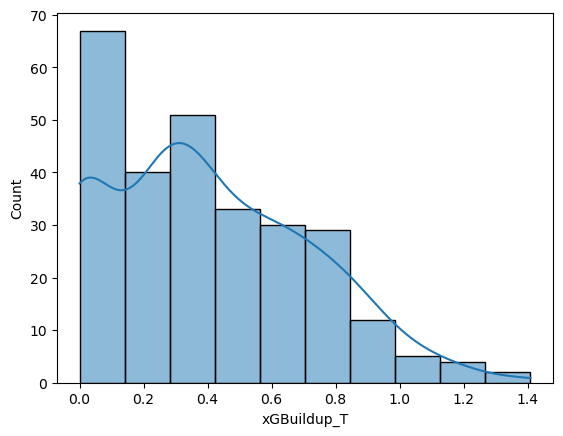

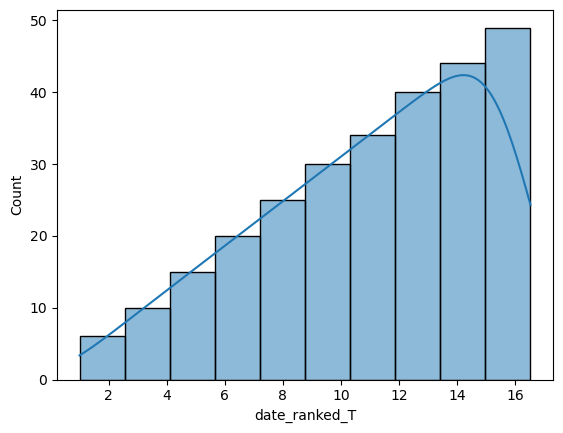

In [18]:
for col in salah_matches_T.select_dtypes(include='number').columns:
    sn.histplot(data=salah_matches_T, x=col, kde=True)
    plt.show()

### Transformation Results:
The square root transformation did a good job at normalizing the distributions of the numeric columns. While a few of them are still slightly skewed, it made the majority of the distributions normal. I also decided to transform the date by ordering them by increments of one, starting at Salah's first game with Liverpool, to his most recent. 

## Label Encoding:

In [22]:
salah_matches_T['opponent'] = ''
salah_matches_T['at_home'] = 0
for i, row in salah_matches.iterrows():
    if row['h_team'] == "Liverpool":
        salah_matches_T.loc[i, 'opponent'] = row['a_team']
        salah_matches_T.loc[i, 'at_home'] = 1
    else:
        salah_matches_T.loc[i, 'opponent'] = row['h_team']
        salah_matches_T.loc[i, 'at_home'] = 0

label_encoder = LabelEncoder()
salah_matches_T['opponent'] = label_encoder.fit_transform(salah_matches_T['opponent'])
salah_matches_T[['h_team', 'a_team', 'opponent', 'at_home']].head()

,h_team,a_team,opponent,at_home
0,Bournemouth,Liverpool,2,0
1,Liverpool,Ipswich,12,1
2,Brentford,Liverpool,3,0
3,Nottingham Forest,Liverpool,20,0
4,Liverpool,Manchester United,17,1


I made an opponent column to store a label encoded version of Liverpool's opponent in any game. I also added the column, 'at_home', to store a 1 or 0 to represent if Liverpool was the home team or away team.

## Scaling:

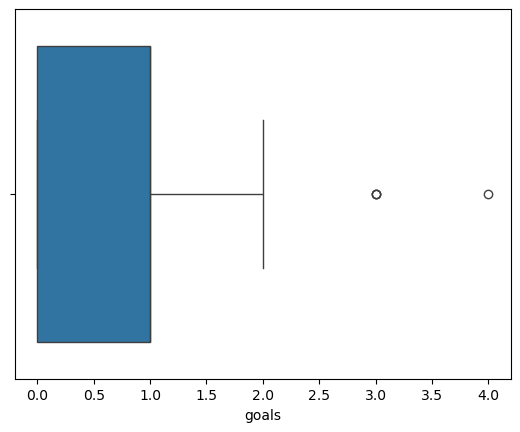

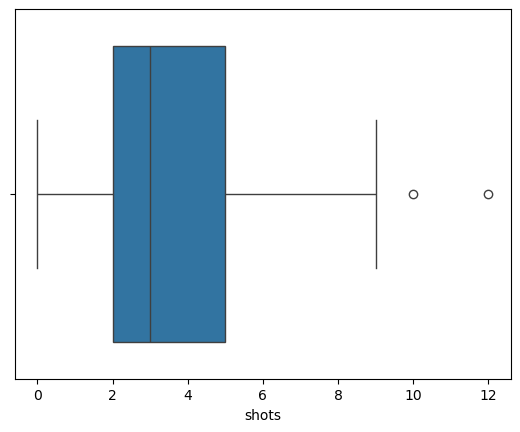

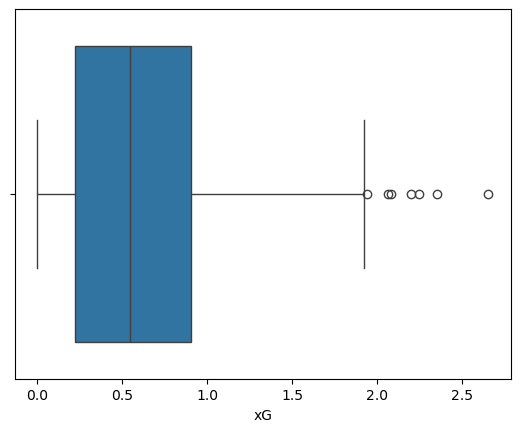

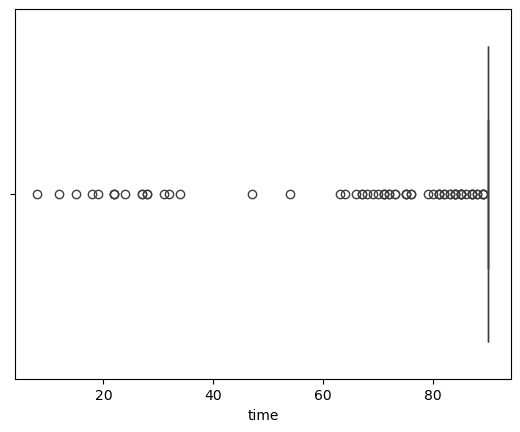

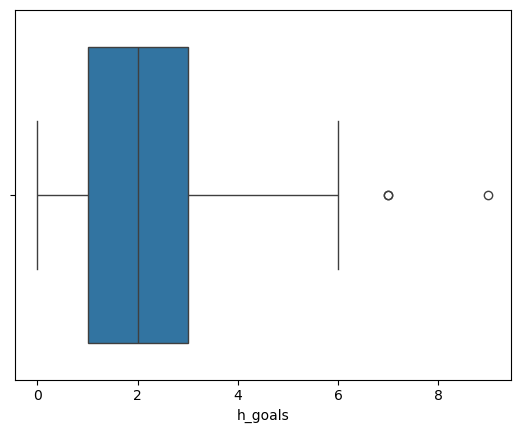

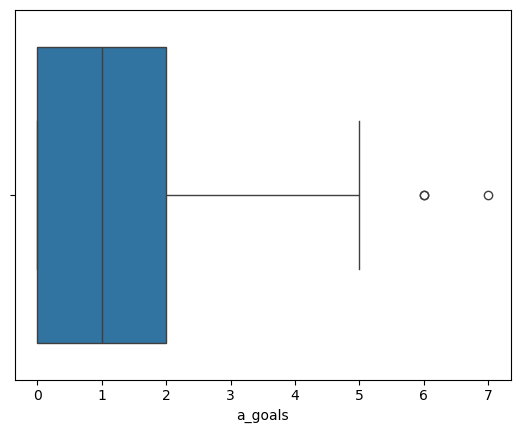

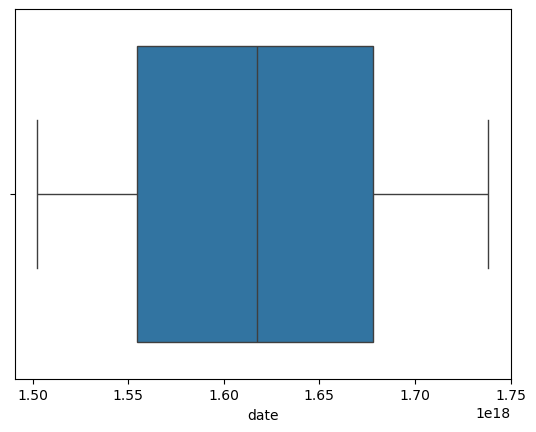

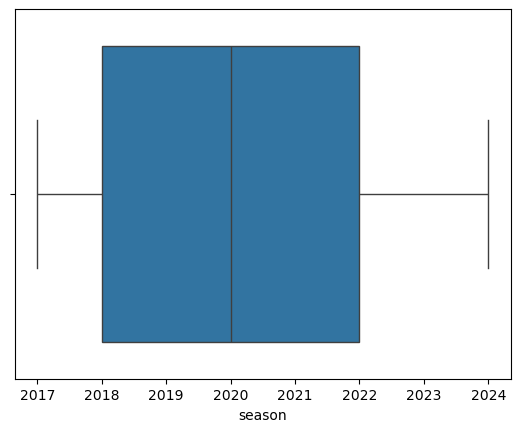

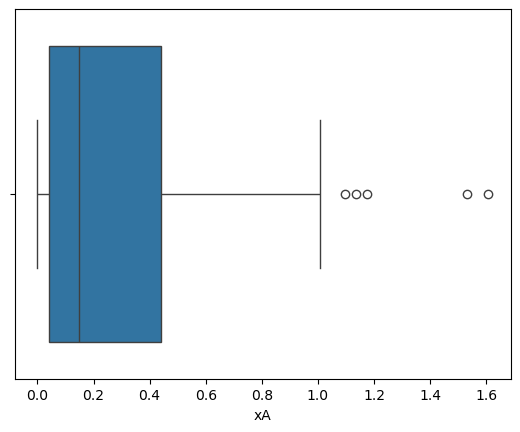

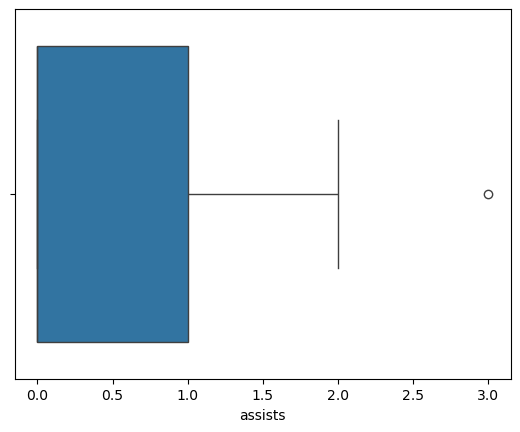

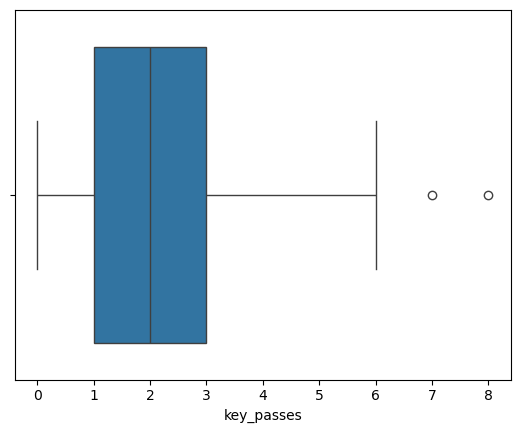

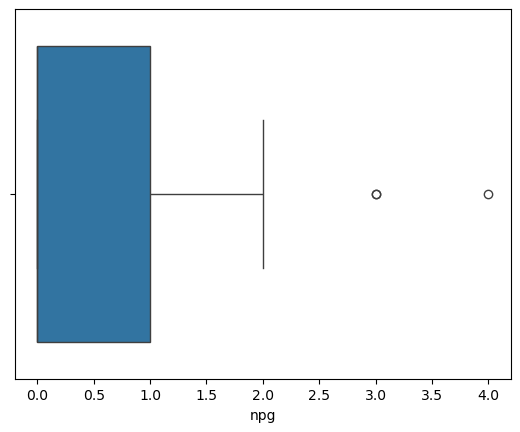

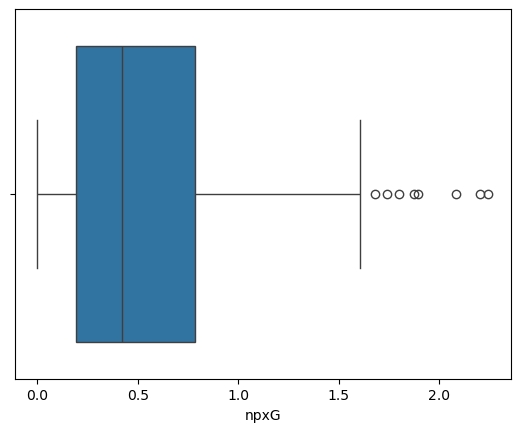

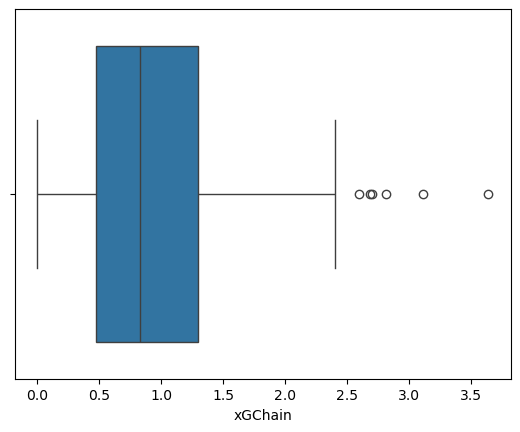

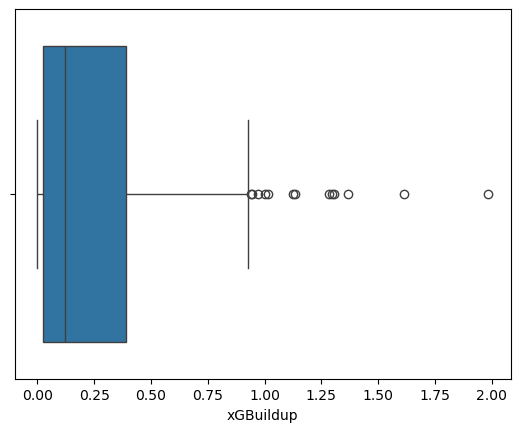

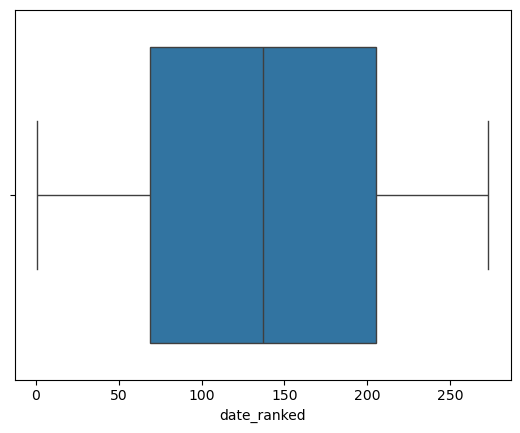

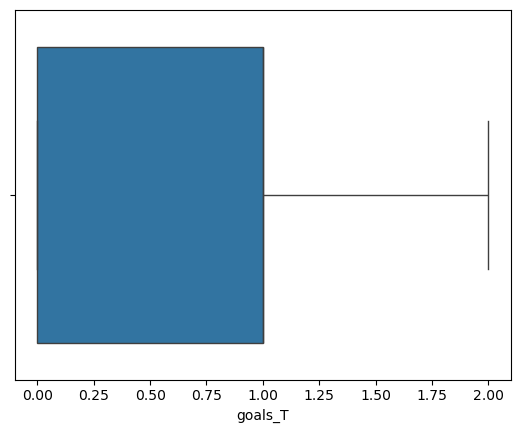

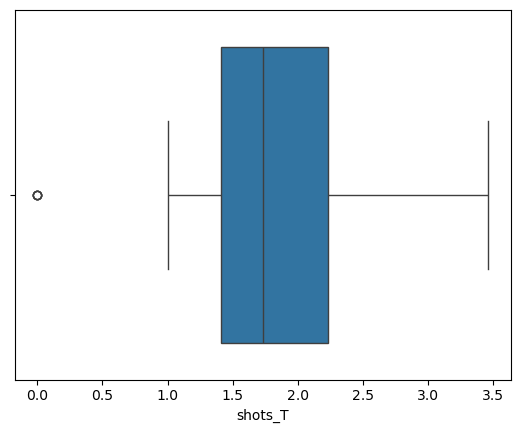

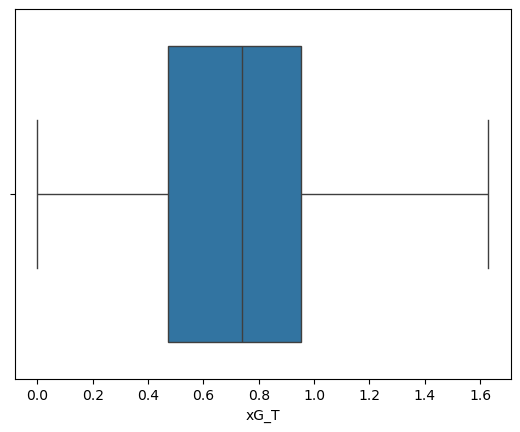

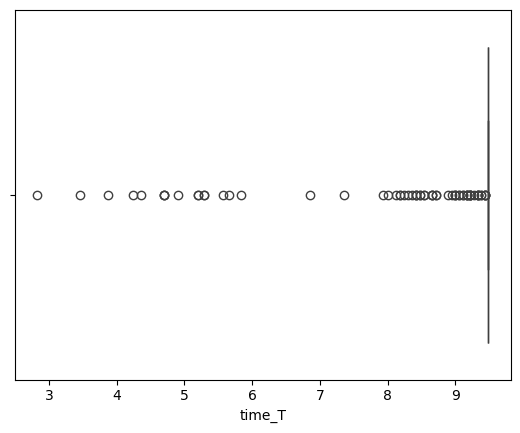

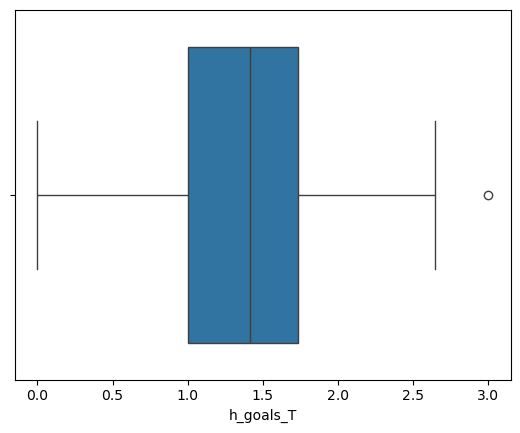

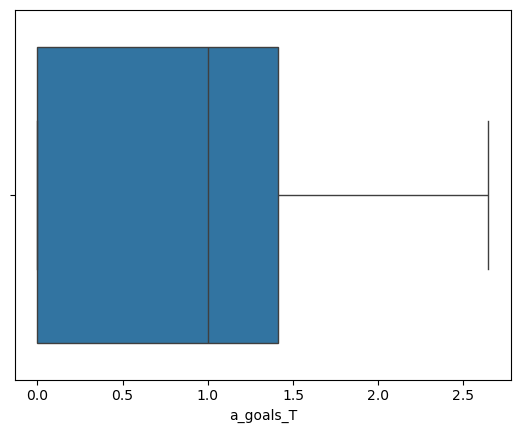

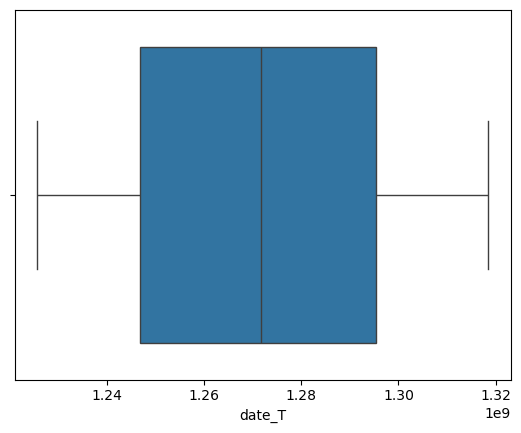

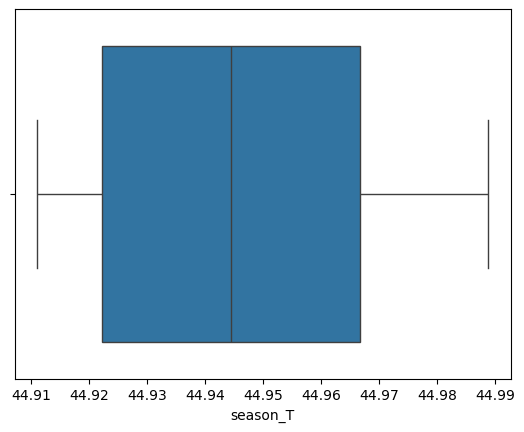

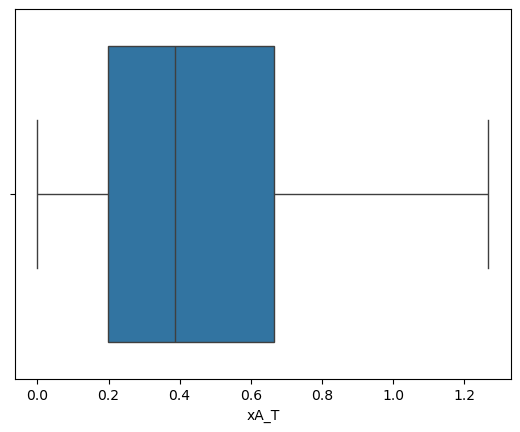

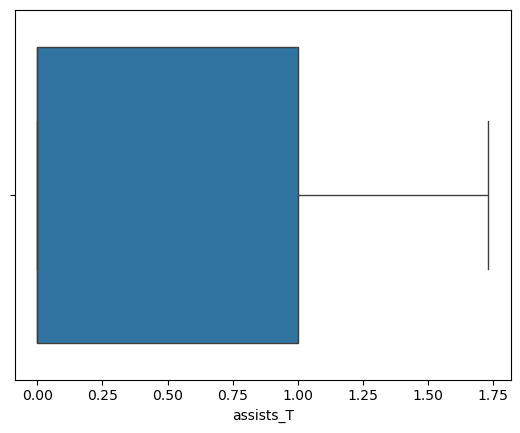

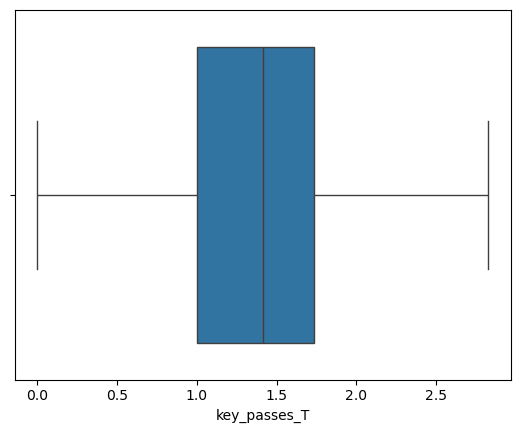

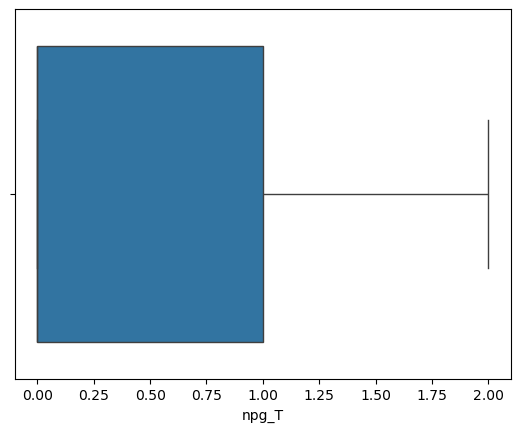

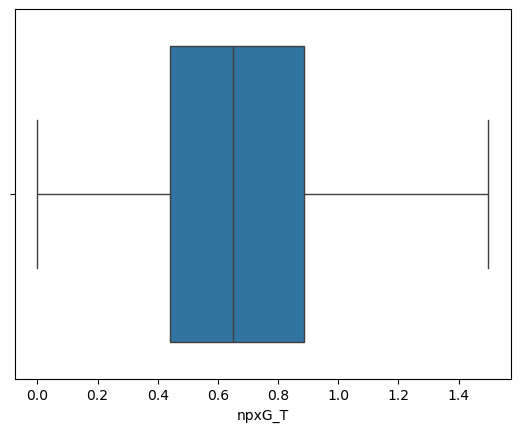

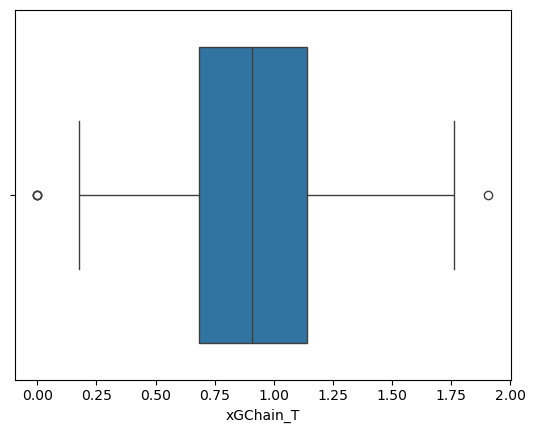

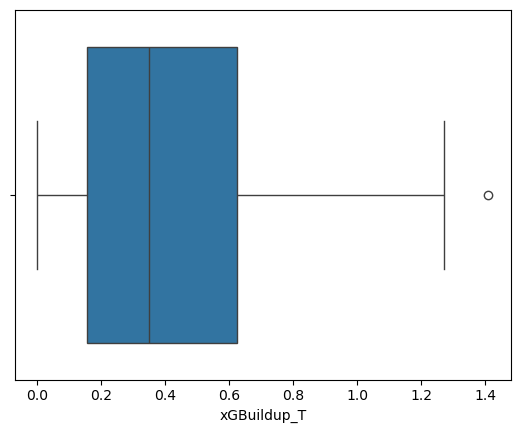

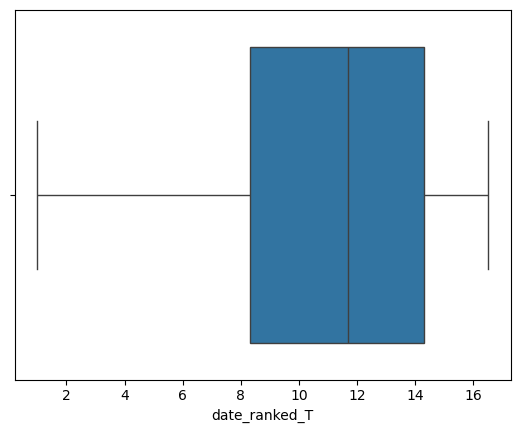

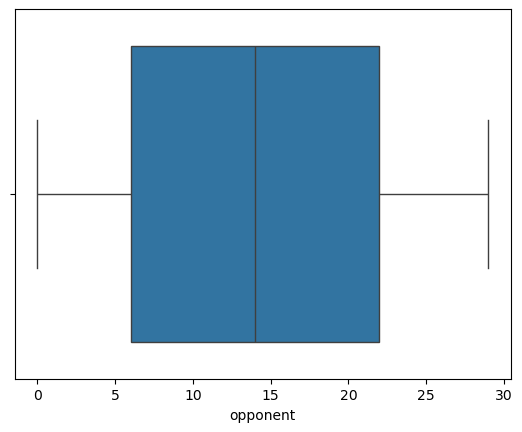

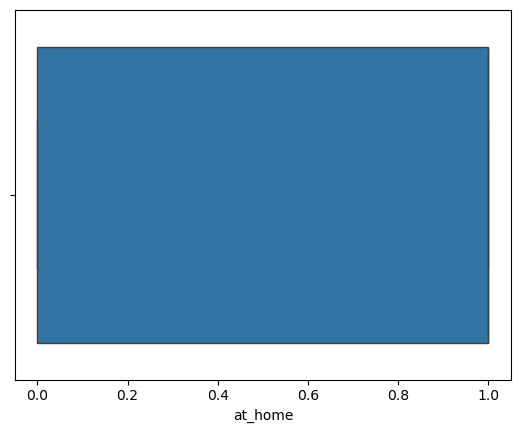

In [25]:
for col in salah_matches_T.select_dtypes(include='number').columns:
    sn.boxplot(data=salah_matches_T, x=col)
    plt.show()

### Necessity for Scaling:
Based on the boxplots above after transforming the data, I am deciding to not scale the data because none of my predictors' scales are too large.

## Visualizing Relationships:

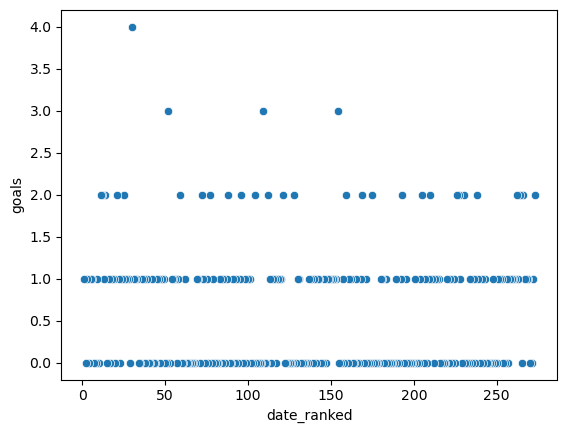

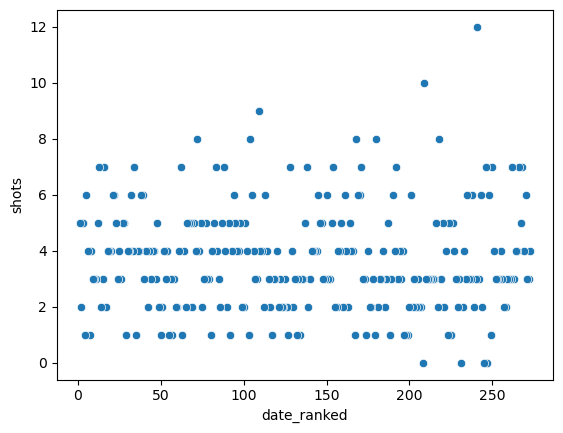

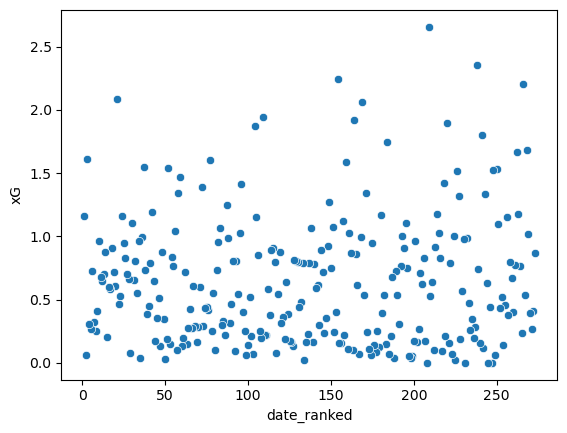

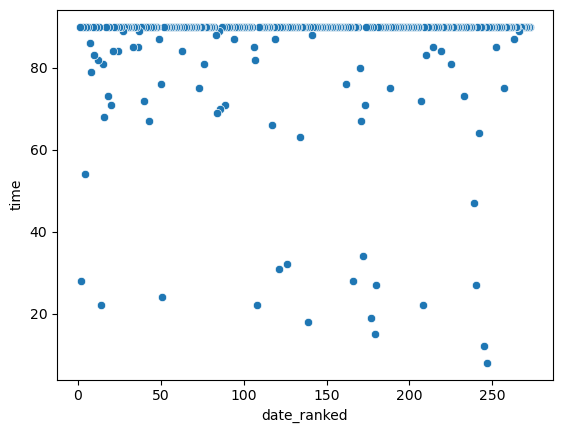

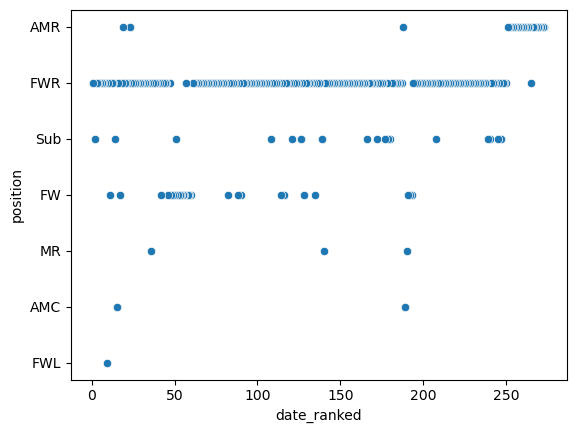

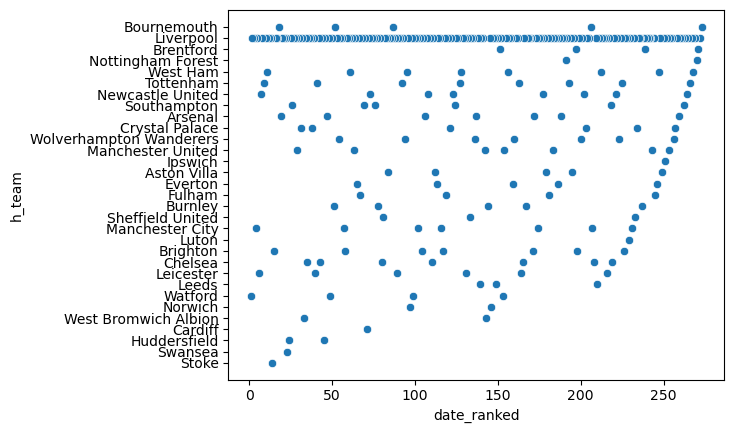

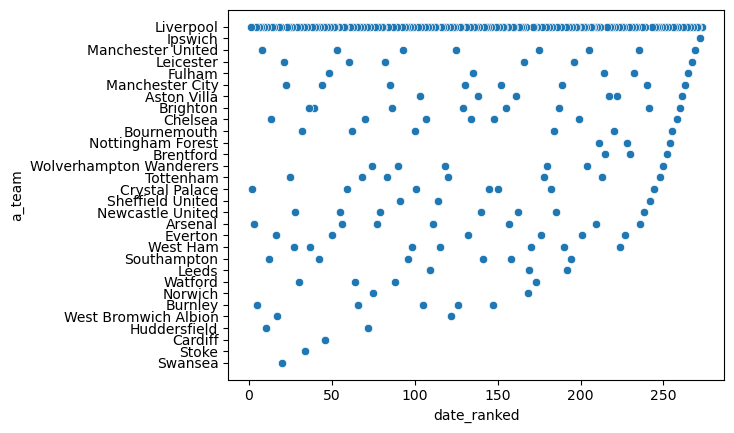

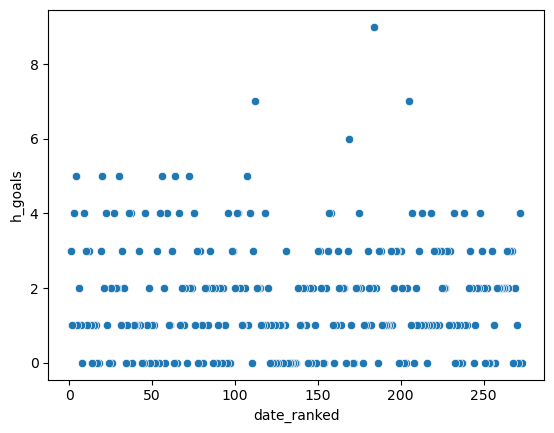

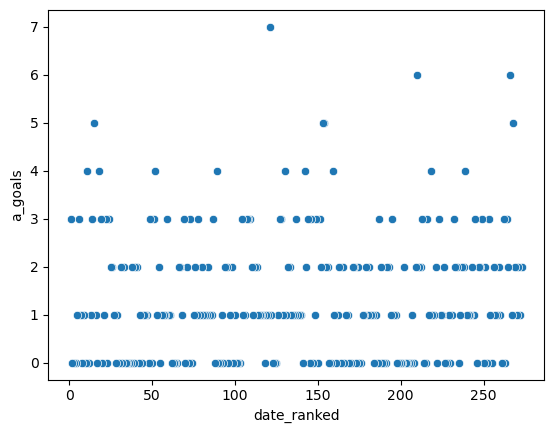

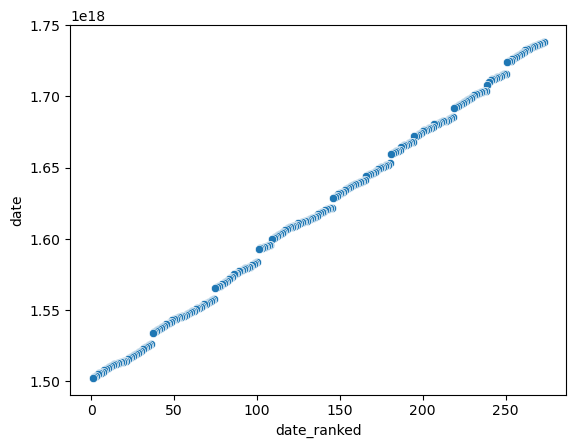

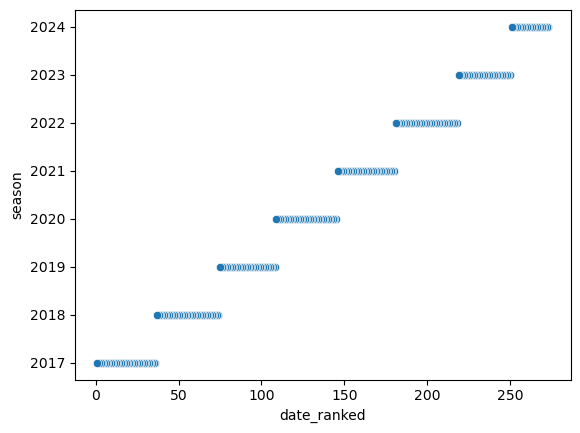

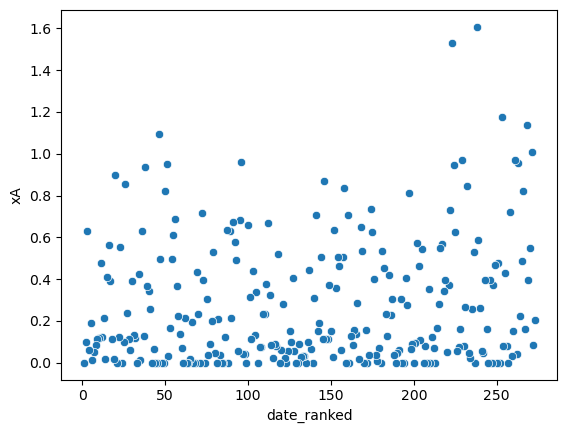

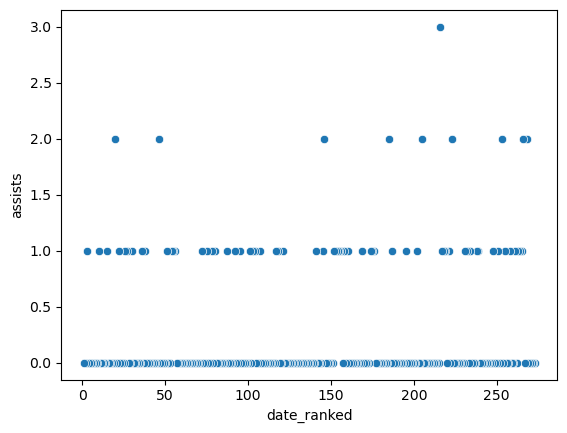

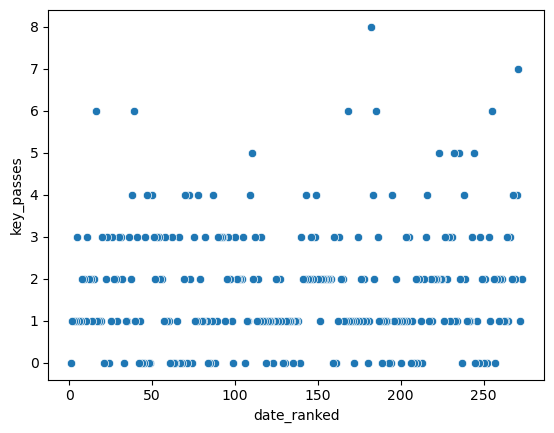

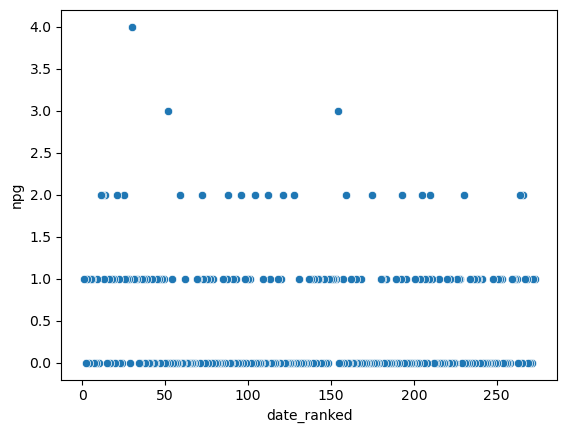

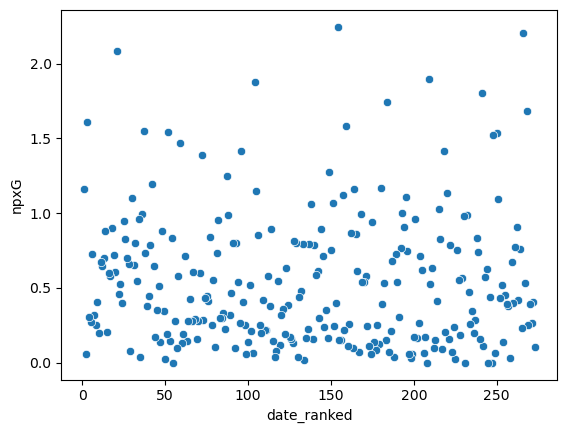

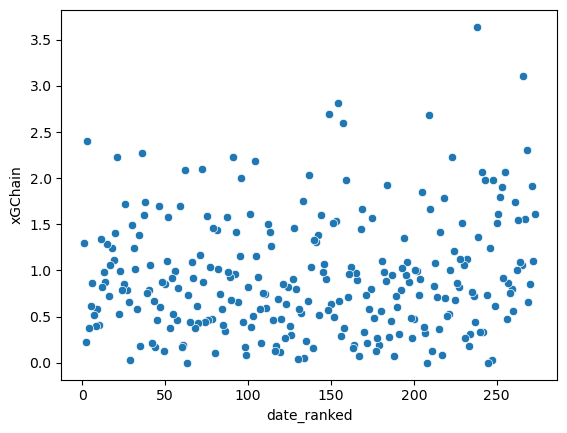

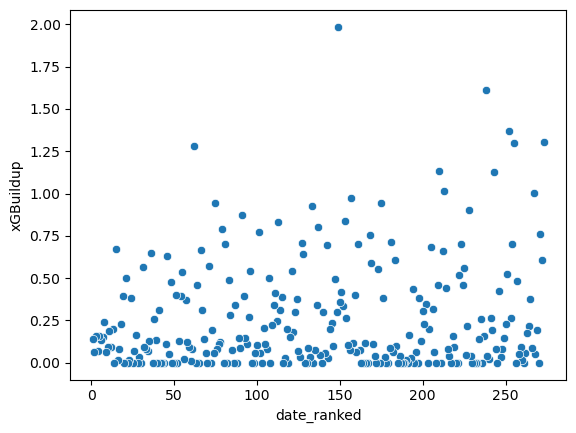

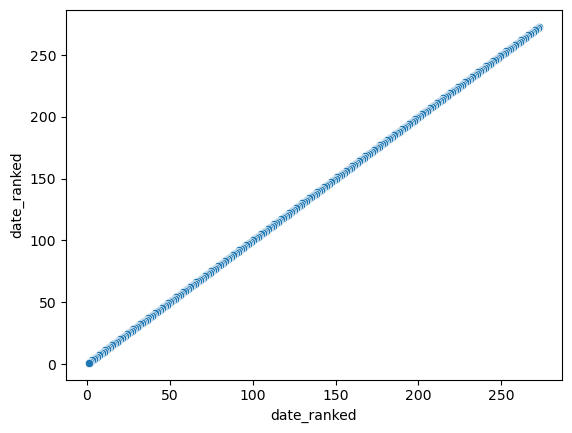

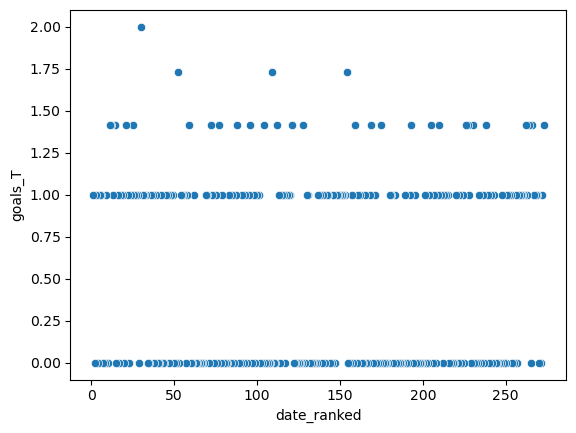

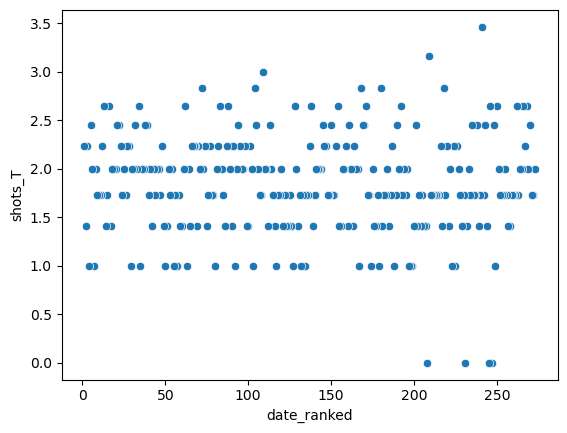

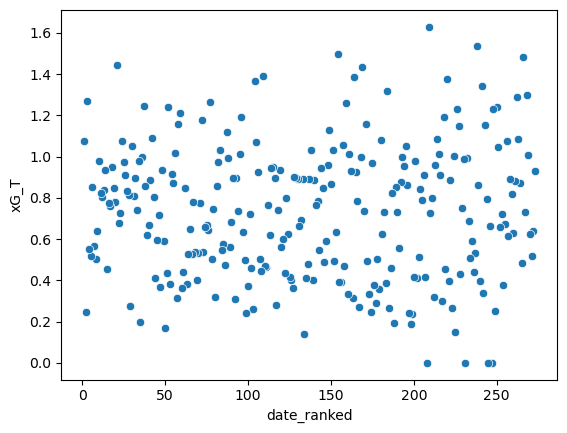

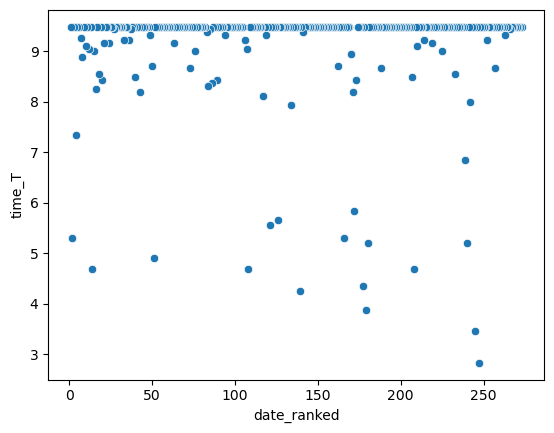

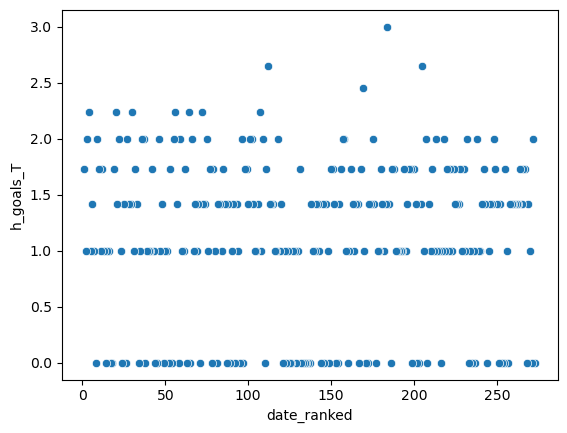

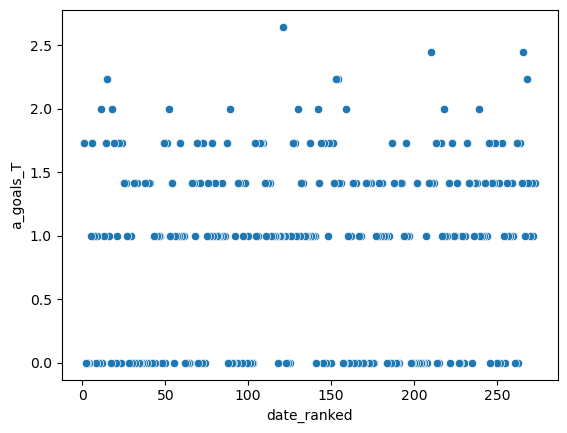

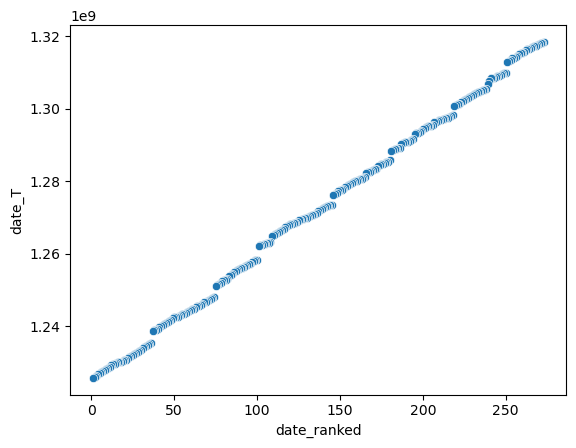

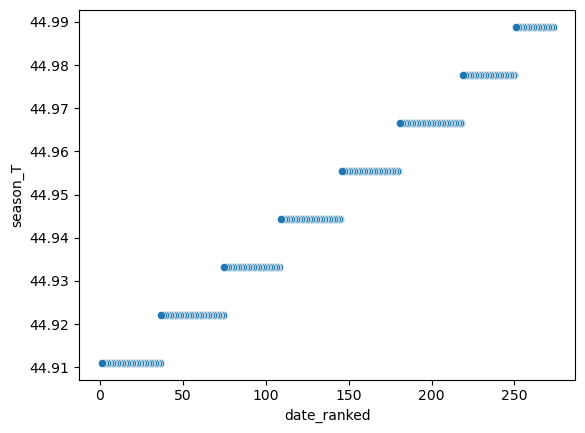

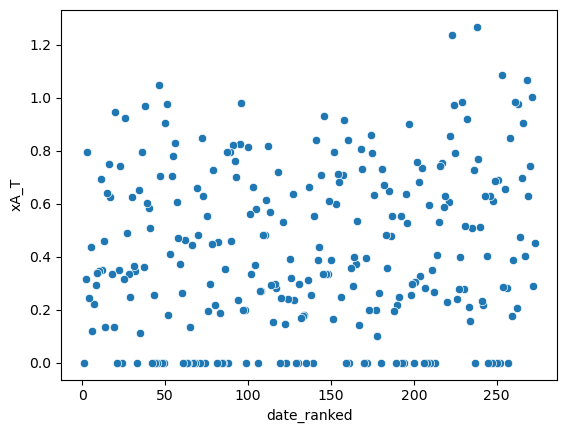

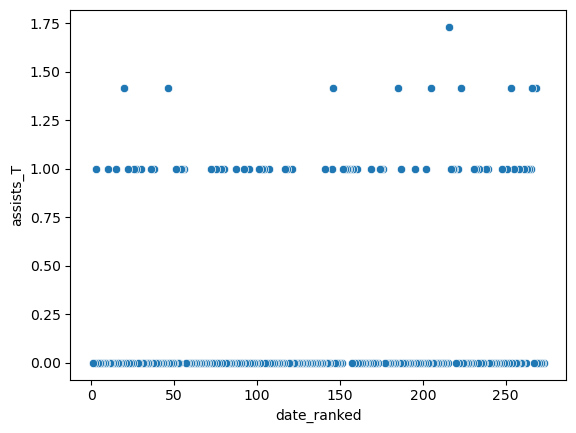

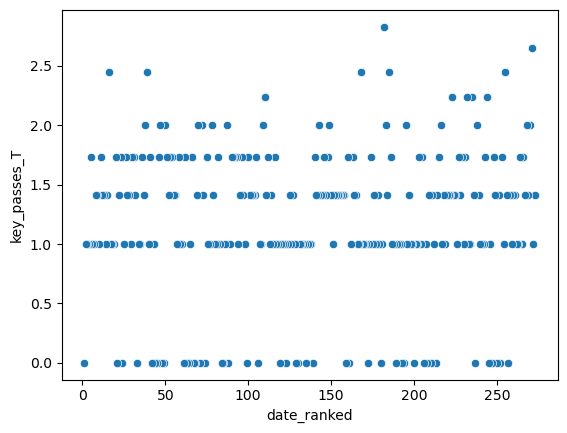

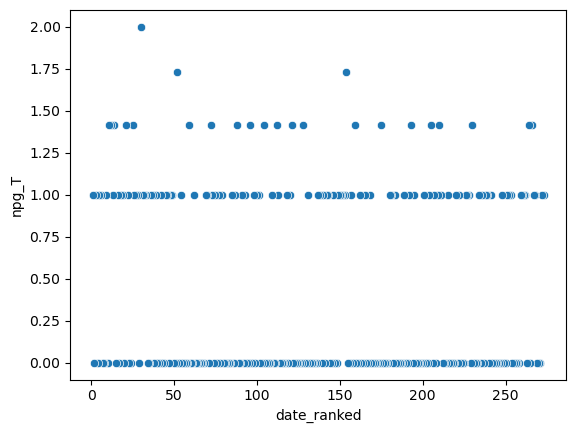

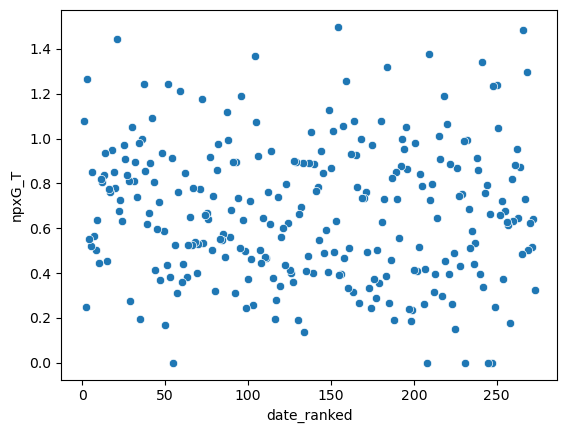

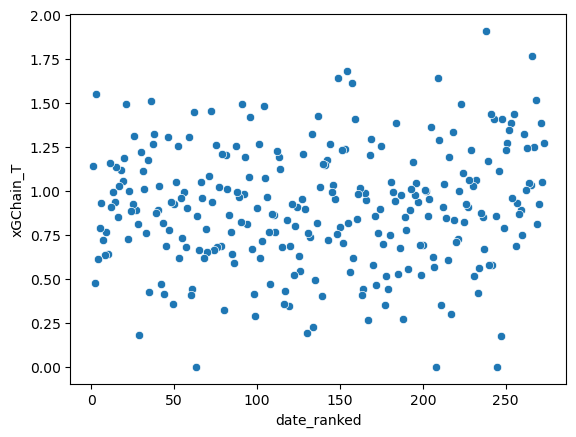

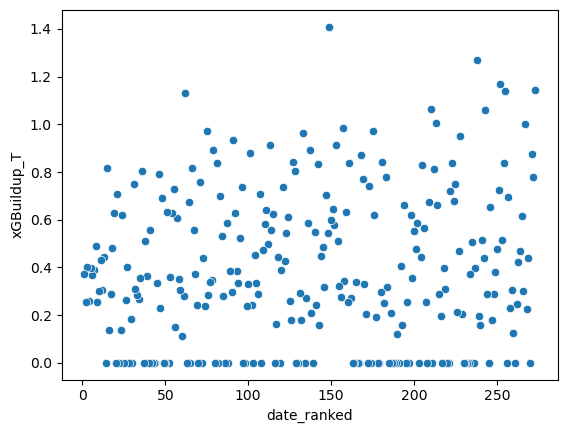

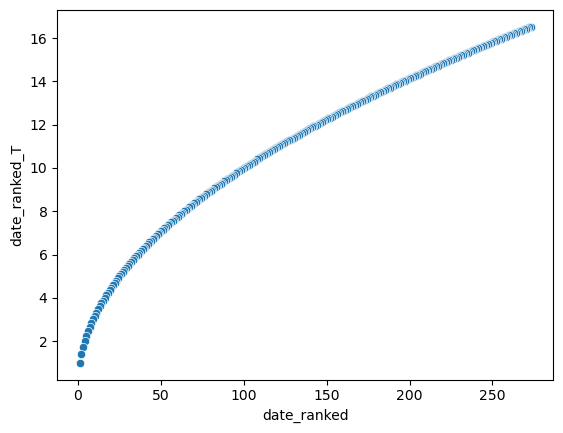

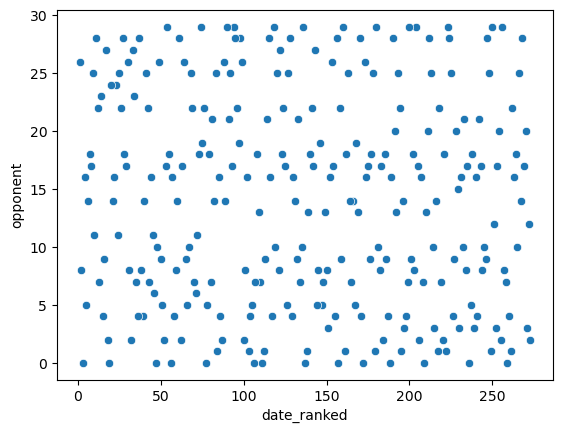

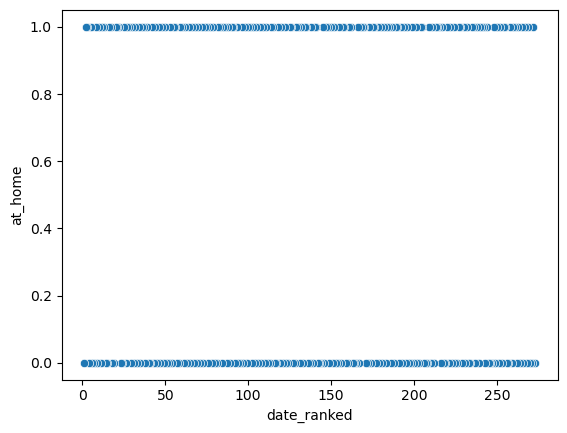

In [28]:
for col in salah_matches_T:
    sn.scatterplot(data=salah_matches_T, x='date_ranked', y=col)
    plt.show()

<Axes: xlabel='opponent', ylabel='goals'>

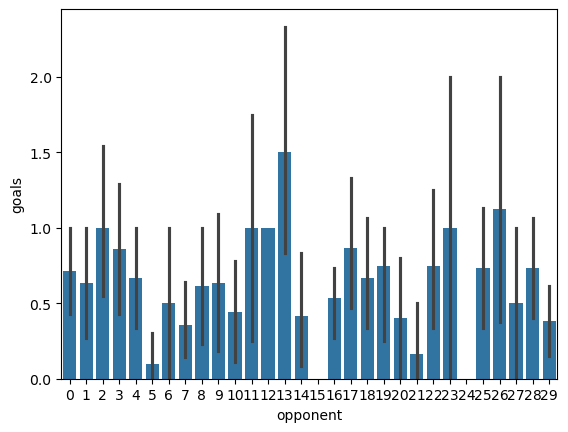

In [31]:
sn.barplot(data=salah_matches_T, x='opponent', y='goals')

<Axes: xlabel='opponent', ylabel='assists'>

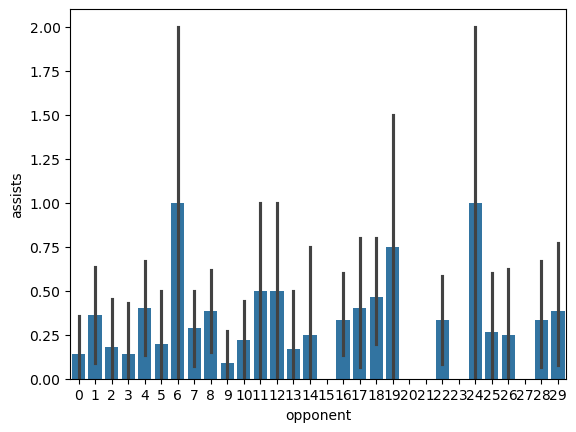

In [32]:
sn.barplot(data=salah_matches_T, x='opponent', y='assists')

### Relationship Explanation:
There doesn't seem to be an increasing or decreasing linear relationship between any of Salah's performance statistics and the progression of his time with Liverpool. This is actually quite good in Salah's case, as so far, the data shows that he has been fairly consistent during his time with Liverpool. I also checked the relationship between opponents and Salah's goal and assist count. He scored most often against Leeds and Watford, and assisted most often against Cardiff and Swansea.

## Feature Selection:
I plan on taking into account his goal count for each game, assist count for each game, the opposing team, whether they are home or away, and the recency of the game.

### Justification:
These predictors will allow me to predict how likely Salah is to make a goal contribution against any given opponent based on his past performances. More recent game dates will have a higher impact on the prediction as well, so we can get a proper representation of his either increasing or declining performance.

### Descriptive Statistics:

In [36]:
salah_matches[['goals', 'assists', 'date_ranked']].describe()

,goals,assists,date_ranked
count,273.000000,273.000000,273.000000
mean,0.644689,0.296703,137.000000
std,0.738975,0.545594,78.952517
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,69.000000
50%,1.000000,0.000000,137.000000
75%,1.000000,1.000000,205.000000
max,4.000000,3.000000,273.000000


In [37]:
salah_matches.groupby('opponent')['goals'].describe()

,count,mean,std,min,25%,50%,75%,max
opponent,,,,,,,,
0,14.0,0.714286,0.611250,0.0,0.00,1.0,1.00,2.0
1,11.0,0.636364,0.674200,0.0,0.00,1.0,1.00,2.0
2,11.0,1.000000,0.894427,0.0,0.50,1.0,1.00,3.0
3,7.0,0.857143,0.690066,0.0,0.50,1.0,1.00,2.0
4,15.0,0.666667,0.723747,0.0,0.00,1.0,1.00,2.0
5,10.0,0.100000,0.316228,0.0,0.00,0.0,0.00,1.0
6,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
7,14.0,0.357143,0.497245,0.0,0.00,0.0,1.00,1.0
8,13.0,0.615385,0.767948,0.0,0.00,0.0,1.00,2.0


In [38]:
salah_matches.groupby('opponent')['assists'].describe()

,count,mean,std,min,25%,50%,75%,max
opponent,,,,,,,,
0,14.0,0.142857,0.363137,0.0,0.00,0.0,0.00,1.0
1,11.0,0.363636,0.504525,0.0,0.00,0.0,1.00,1.0
2,11.0,0.181818,0.404520,0.0,0.00,0.0,0.00,1.0
3,7.0,0.142857,0.377964,0.0,0.00,0.0,0.00,1.0
4,15.0,0.400000,0.507093,0.0,0.00,0.0,1.00,1.0
5,10.0,0.200000,0.421637,0.0,0.00,0.0,0.00,1.0
6,2.0,1.000000,1.414214,0.0,0.50,1.0,1.50,2.0
7,14.0,0.285714,0.468807,0.0,0.00,0.0,0.75,1.0
8,13.0,0.384615,0.506370,0.0,0.00,0.0,1.00,1.0


### Predictors and Response:
I will use the date of the games, goal and assist counts, the opponent, whether Liverpool was home or away as my predictors. I will create a column called contributed to check in past games if Salah contributed or did not contribute. This will then be my response variable that I will predict.

### Issues with Selected Features:
Luckily, none of my features possess missing values or drastic outliers that will effect my research. The goals and assists columns have slightly non-normal distributions, but since the range of values is so small, it shouldn't cause too many issues. I used square root transformation to normalize my distributions and it worked fairly well.

## Adding Contributed Column

In [42]:
salah_matches_T['contributed'] = 0
for i, row in salah_matches_T.iterrows():
    if row['goals'] > 0 or row['assists'] > 0:
        salah_matches_T.loc[i, 'contributed'] = 1
    else:
        salah_matches_T.loc[i, 'contributed'] = 0

In [43]:
salah_matches_T[['goals', 'assists', 'contributed']].head()

,goals,assists,contributed
0,2,0,1
1,1,0,1
2,0,0,0
3,0,0,0
4,1,0,1


In [44]:
salah_matches_T.columns

Index(['goals', 'shots', 'xG', 'time', 'position', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'season', 'xA', 'assists', 'key_passes',
       'npg', 'npxG', 'xGChain', 'xGBuildup', 'date_ranked', 'goals_T',
       'shots_T', 'xG_T', 'time_T', 'h_goals_T', 'a_goals_T', 'date_T',
       'season_T', 'xA_T', 'assists_T', 'key_passes_T', 'npg_T', 'npxG_T',
       'xGChain_T', 'xGBuildup_T', 'date_ranked_T', 'opponent', 'at_home',
       'contributed'],
      dtype='object')

## ML Models
I have decided to use Logisitic Regression, Random Forest, and Decision Tree models to make my predictions

### Justification
I chose Logistic Regression as it is a simple and effective model for binary classification and will set a good standard to compare my other models to. I chose Random Forest and Decision Tree because of their ability to handle a mixture of numeric and categorical data which will be necessary for my purposes.

## Logistic Regression

In [50]:
X1 = salah_matches_T[['goals_T', 'assists_T', 'date_ranked_T', 'opponent', 'at_home']]
y1 = salah_matches_T['contributed']

In [51]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X1_train, y1_train)
y1_predict = lr.predict(X1_test)

In [53]:
from sklearn import metrics
y1_pred = lr.predict(X1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 1.0


In [54]:
y1_pred_proba = lr.predict_proba(X1_test)[:, 1]
print("AUC Score:", metrics.roc_auc_score(y1_test, y1_pred_proba))

AUC Score: 1.0


In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
skf = StratifiedKFold(n_splits=5, random_state=None)
scores1 = cross_val_score(lr, X1, y1, cv=skf)
predictions1 = cross_val_predict(lr, X1, y1, cv=skf)
print(scores1)

[1. 1. 1. 1. 1.]


In [57]:
print(scores1.mean())

1.0


In [58]:
print(scores1.std())

0.0


## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [61]:
y2_pred = rf.predict(X1_test)
print("Accuracy:", metrics.accuracy_score(y1_test, y2_pred))

Accuracy: 1.0


In [62]:
y2_pred_proba = rf.predict_proba(X1_test)[:, 1]
print("AUC Score:", metrics.roc_auc_score(y1_test, y2_pred_proba))

AUC Score: 1.0


In [64]:
scores2 = cross_val_score(rf, X1, y1, cv=skf)
predictions2 = cross_val_predict(rf, X1, y1, cv=skf)
print(scores2)

[1. 1. 1. 1. 1.]


In [66]:
print(scores2.mean())

1.0


In [74]:
print(scores2.std())

0.0


## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=42)

In [92]:
y3_pred = dt.predict(X1_test)
print("Accuracy:", metrics.accuracy_score(y1_test, y3_pred))

Accuracy: 1.0


In [94]:
y3_pred_proba = dt.predict_proba(X1_test)[:, 1]
print("AUC Score:", metrics.roc_auc_score(y1_test, y3_pred_proba))

AUC Score: 1.0


In [96]:
scores3 = cross_val_score(dt, X1, y1, cv=skf)
predictions3 = cross_val_predict(dt, X1, y1, cv=skf)
print(scores3)

[1. 1. 1. 1. 1.]


In [98]:
print(scores3.mean())

1.0


In [100]:
print(scores3.std())

0.0


## Results and Comparison
After training and evaluating my models, I can confidently say that Logistic Regression, Random Forest, and Decision Tree all performed very well. Based on the accuracy and AUC scores for the three models, they all made correct predictions 100% of the time. Likewise, after doing stratified k-fold validation on each model, they are all predicting unseen data perfectly.

# Conclusion:
## Best Model
Each of the models were perfect in their predictions, so it is difficult to choose one as the best. If I were to choose one going forward, I would choose Logistic Regression due to its simplicity, speed, and overall efficiency. These attributes would make my model much more scalable as I currently have a relatively small dataset, but in the future, that may not be the case.
## Usefulness:
Like I stated in my abstract, having the ability to predict the trend of a players performance and if they will contribute in a game or not is a great tool for deciding whether a club should re-sign a player or not. In this specific scenario, I predicted Mohamed Salah's performance, but this approach can be applied to any player.
## Lessons Learned:
I learned that if I am working with a binary classification model and I would like a speedy and efficient model, to choose Logistic Regression due to its scalability. Along with this, binning continuous numeric data also work very well for my use case.
## Limitations:
While my model works well for attacking players whose performance is largely determined by their goal and assist counts, it may be harder to generalize to defending players whose performance isn't as dependent on numeric statistics.